# Analyzing Healthcare Provider Shortage - Part 4/4

The big question that we would like to answer with this analysis is that: `What are the socieconomic and demographic factors that influence access to healthcare providers?`

In this notebook, will try to answer this question by:

 - Identifying which factors are most predictive of provider count
 - Identifying the influence that these factors have on provider count
 - Identifying whether the influence is positive or negative

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Gather-and-Plot-Data" data-toc-modified-id="Gather-and-Plot-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Gather and Plot Data</a></span><ul class="toc-item"><li><span><a href="#Get-the-Cleaned-Data-Layer" data-toc-modified-id="Get-the-Cleaned-Data-Layer-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Get the Cleaned Data Layer</a></span></li><li><span><a href="#Plot-Data" data-toc-modified-id="Plot-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plot Data</a></span><ul class="toc-item"><li><span><a href="#Pair-Plot" data-toc-modified-id="Pair-Plot-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Pair Plot</a></span></li><li><span><a href="#Correlation-Plot" data-toc-modified-id="Correlation-Plot-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Correlation Plot</a></span></li></ul></li></ul></li><li><span><a href="#Generate-a-Global-Model" data-toc-modified-id="Generate-a-Global-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Generate a Global Model</a></span><ul class="toc-item"><li><span><a href="#Create-Predictor-and-Response-Variables" data-toc-modified-id="Create-Predictor-and-Response-Variables-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Create Predictor and Response Variables</a></span></li><li><span><a href="#Create-a-Base-Model" data-toc-modified-id="Create-a-Base-Model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Create a Base Model</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression-Model-using-Stats-Models" data-toc-modified-id="Linear-Regression-Model-using-Stats-Models-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Linear Regression Model using Stats Models</a></span></li><li><span><a href="#Verify-Assumptions" data-toc-modified-id="Verify-Assumptions-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Verify Assumptions</a></span></li><li><span><a href="#Outlier-Detection" data-toc-modified-id="Outlier-Detection-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Outlier Detection</a></span></li><li><span><a href="#Remove-Outliers" data-toc-modified-id="Remove-Outliers-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Remove Outliers</a></span><ul class="toc-item"><li><span><a href="#Re-run-Model" data-toc-modified-id="Re-run-Model-2.2.4.1"><span class="toc-item-num">2.2.4.1&nbsp;&nbsp;</span>Re-run Model</a></span></li></ul></li></ul></li><li><span><a href="#Feature-Selection-and-Importance" data-toc-modified-id="Feature-Selection-and-Importance-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Feature Selection and Importance</a></span><ul class="toc-item"><li><span><a href="#Run-Feature-Selection-Algorithms" data-toc-modified-id="Run-Feature-Selection-Algorithms-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Run Feature Selection Algorithms</a></span></li><li><span><a href="#Identify-Features-Using-Lasso" data-toc-modified-id="Identify-Features-Using-Lasso-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Identify Features Using Lasso</a></span></li></ul></li><li><span><a href="#Regression-with-Selected-Features" data-toc-modified-id="Regression-with-Selected-Features-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Regression with Selected Features</a></span><ul class="toc-item"><li><span><a href="#Clean-the-Data" data-toc-modified-id="Clean-the-Data-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Clean the Data</a></span></li><li><span><a href="#Transform-Data" data-toc-modified-id="Transform-Data-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Transform Data</a></span></li><li><span><a href="#Run-Global-Model" data-toc-modified-id="Run-Global-Model-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Run Global Model</a></span></li><li><span><a href="#Verify-Assumptions" data-toc-modified-id="Verify-Assumptions-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>Verify Assumptions</a></span></li></ul></li></ul></li><li><span><a href="#Geographically-Weighted-Regression-(GWR)-Model" data-toc-modified-id="Geographically-Weighted-Regression-(GWR)-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Geographically Weighted Regression (GWR) Model</a></span><ul class="toc-item"><li><span><a href="#Run-GWR-Model" data-toc-modified-id="Run-GWR-Model-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Run GWR Model</a></span></li><li><span><a href="#Access-GWR-Results-as-Spatially-Enabled-Dataframe" data-toc-modified-id="Access-GWR-Results-as-Spatially-Enabled-Dataframe-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Access GWR Results as Spatially Enabled Dataframe</a></span></li><li><span><a href="#Plot-GWR-Results" data-toc-modified-id="Plot-GWR-Results-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Plot GWR Results</a></span><ul class="toc-item"><li><span><a href="#Plot-Average-Household-Size" data-toc-modified-id="Plot-Average-Household-Size-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Plot Average Household Size</a></span></li><li><span><a href="#Plot-Average-Prescription-Drug" data-toc-modified-id="Plot-Average-Prescription-Drug-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Plot Average Prescription Drug</a></span></li></ul></li></ul></li><li><span><a href="#Forest-Based-Classification-and-Regression-Trees-Model" data-toc-modified-id="Forest-Based-Classification-and-Regression-Trees-Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Forest Based Classification and Regression Trees Model</a></span><ul class="toc-item"><li><span><a href="#Build-RF-Model" data-toc-modified-id="Build-RF-Model-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Build RF Model</a></span></li><li><span><a href="#Get-Variable-Importance" data-toc-modified-id="Get-Variable-Importance-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Get Variable Importance</a></span></li><li><span><a href="#Plot-Variable-Importance" data-toc-modified-id="Plot-Variable-Importance-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Plot Variable Importance</a></span><ul class="toc-item"><li><span><a href="#Plot-Best-Iteration" data-toc-modified-id="Plot-Best-Iteration-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Plot Best Iteration</a></span></li></ul></li></ul></li><li><span><a href="#Local-Bivariate-Relationships-(LBR)-Model" data-toc-modified-id="Local-Bivariate-Relationships-(LBR)-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Local Bivariate Relationships (LBR) Model</a></span><ul class="toc-item"><li><span><a href="#Build-Model---Provider-Count-and-White-Population" data-toc-modified-id="Build-Model---Provider-Count-and-White-Population-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Build Model - Provider Count and White Population</a></span><ul class="toc-item"><li><span><a href="#Access-Model-Results-as-Spatially-Enabled-Dataframe" data-toc-modified-id="Access-Model-Results-as-Spatially-Enabled-Dataframe-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Access Model Results as Spatially Enabled Dataframe</a></span></li><li><span><a href="#Plot-Results-on-Map" data-toc-modified-id="Plot-Results-on-Map-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Plot Results on Map</a></span></li></ul></li><li><span><a href="#Build-Model---Provider-Count-and-Graduate-Degree" data-toc-modified-id="Build-Model---Provider-Count-and-Graduate-Degree-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Build Model - Provider Count and Graduate Degree</a></span><ul class="toc-item"><li><span><a href="#Access-Model-Results-as-Spatially-Enabled-Dataframe" data-toc-modified-id="Access-Model-Results-as-Spatially-Enabled-Dataframe-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Access Model Results as Spatially Enabled Dataframe</a></span></li><li><span><a href="#Plot-Results-on-Map" data-toc-modified-id="Plot-Results-on-Map-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Plot Results on Map</a></span></li></ul></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Part 4: Provider Shortage - Model and Understand Shortage

In this section, we will:
- Gather and Process Demographic and Heath Expenditure data
- Aggragate Provider Count for all counties in U.S.
- Generate a Base (OLS) Model of provider count using demographic and health expenditure variables
- Perform Feature Selection using multiple techniques to select relevant features
- Run a Global (OLS) model using selected features
- Create a Geographically Weighted Regression (GWR) Model to understand how various predictors vary accross different counties
- Create a Forest Based Classification and Regression Trees Model to understand Non-linear relations and to indentify important variables
- Create Local Bivariate Relationships (LBR) Model to understand the type and significance of relationships of Provider Count with respect to variables selected from Forest based model.

In [1]:
# Import Libraries
from IPython.display import display

# Import arcgis
import arcgis
from arcgis.gis import GIS
from arcgis.features import FeatureLayer
from arcgis.mapping import WebMap

# Import libraries for data exploration
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np

# Import plotting libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Import library for time
import time


In [2]:
# Create connection
gis = GIS("https://datascienceqa.esri.com/portal", "portaladmin", "esri.agp", verify_cert=False)

## Gather and Plot Data
<a name="gather-data"></a>

To understand shortage of healthcare providers we will try to identify socioeconomic and demographic factors that influence access to these providers. We will use the cleaned aggregated data layer `demographic_healthexp_clean_allproviders` created in Part 2 of this 4 part study. This layer includes the provider count, demographic data and some health expenditure features.

### Get the Cleaned Data Layer

In [3]:
# Search for the data layer
allsearch_result = gis.content.search('title: demographic_healthexp_clean_allproviders')
allsearch_result

[<Item title:"demographic_healthexp_clean_allproviders" type:Feature Layer Collection owner:portaladmin>,
 <Item title:"demographic_healthexp_clean_allproviders" type:Service Definition owner:portaladmin>]

<Item title:"demographic_healthexp_clean_allproviders" type:Feature Layer Collection owner:portaladmin>
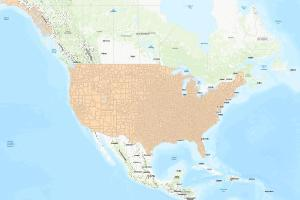

In [4]:
# Get the layer
allprovider = allsearch_result[0]
allprovider

In [5]:
allprovider_layer = allprovider.layers[0]
for f in allprovider_layer.properties.fields[:5]:
    print(f['name'], '\t',f['alias'])

objectid 	 OBJECTID
state 	 state
county 	 county
asian_pop 	 asian_pop
amerind_pop 	 amerind_pop


In [6]:
# Store data from layer as a spatially enabled dataframe
allprovider_df = allprovider_layer.query(as_df=True)
allprovider_df.shape

(3139, 35)

In [7]:
# Look at the first few rows of dataframe
allprovider_df.head()

SHAPE   SHAPE__Area  \
0  {'rings': [[[-8529642.2486, 4688391.039899997]...  9.139007e+08   
1  {'rings': [[[-10120538.0346, 3896326.054200001...  1.526209e+09   
2  {'rings': [[[-9221715.5229, 5050074.560699999]...  2.522762e+09   
3  {'rings': [[[-9290699.0981, 4093591.7991999984...  8.908702e+08   
4  {'rings': [[[-9341355.0324, 3994505.8356000036...  4.963801e+08   

   SHAPE__Length  amerind_pop  asian_pop  asso_deg  avg_healthcare  \
0            0.0          423       1701      5020         7896.60   
1            0.0            3          6        29         3310.96   
2            0.0          168        421      4309         4698.76   
3            0.0           69        258       855         4625.75   
4            0.0          307       1727      5603         5085.66   

   avg_healthinsurance  avg_hhinc  avg_hhsz  avg_labtest  avg_medicalcare  \
0              5227.44     118378      2.85        83.06          2669.16   
1              2149.61      38216      2.40        36.65          1161.34   
2              3081.77      63225      2.47        51.40          1616.99   
3              3042.93      60360      2.77        47.81          1582.82   
4              3356.61      73754      2.81        54.48          1729.05   

   avg_medicalsrvc  avg_medicare  avg_personalinsurance  avg_presdrug  \
0          1497.17        767.21                 592.98        157.57   
1           579.97        475.83                 191.88        102.27   
2           861.89        547.19                 313.28        114.41   
3           822.59        557.61                 289.06        122.89   
4           948.00        520.50                 344.50        109.17   

   avg_socsecurity  bach_deg  black_pop            county  edubase  grad_deg  \
0         11766.62     10961      12062    Calvert County    65337      8931   
1          3298.61        50        895  Issaquena County      977        45   
2          5933.05      3811       1422     Seneca County    38284      2153   
3          5640.16       990        558      Banks County    13282       574   
4          7113.68     11105      49467   Rockdale County    60571      5462   

   hisp_pop  median_age  minority_pop  objectid  otherace_pop  percap_income  \
0      3945        41.0         20664         1           886          41430   
1         8        37.9           913         2             2          16066   
2      2977        40.0          5873         3           882          24981   
3      1307        40.4          2464         4           759          21821   
4      9491        37.8         62154         5          4497          26350   

   pop_density  provider_count  some_college state  total_population  \
0        440.2          1044.0         16211    MD             93836   
1          3.4             5.0           199    MS              1403   
2        101.8           621.0          7627    OH             56104   
3         81.6            79.0          2043    GA             18940   
4        692.1          1210.0         11944    GA             89832   

   unemp_rate  white_pop  
0         5.6      75625  
1         5.2        494  
2         5.5      51908  
3         3.1      16894  
4         6.1      31300

We can see that the dataframe (`allprovider_df`) has 3139 rows and 41 columns.

### Plot Data
<a name="plot"></a>

Before we plot the data, we will create a copy of `allprovider_df` and remove `objectid` and `SHAPE` columns

In [11]:
# Create copy of dataframe
test_newcounty_df = allprovider_df.copy()

In [12]:
# Drop the shape and objectid columns
test_newcounty_df.drop(['objectid','SHAPE','SHAPE__Length','SHAPE__Area'], axis=1, inplace=True)
test_newcounty_df.columns

Index(['amerind_pop', 'asian_pop', 'asso_deg', 'avg_healthcare',
       'avg_healthinsurance', 'avg_hhinc', 'avg_hhsz', 'avg_labtest',
       'avg_medicalcare', 'avg_medicalsrvc', 'avg_medicare',
       'avg_personalinsurance', 'avg_presdrug', 'avg_socsecurity', 'bach_deg',
       'black_pop', 'county', 'edubase', 'grad_deg', 'hisp_pop', 'median_age',
       'minority_pop', 'otherace_pop', 'percap_income', 'pop_density',
       'provider_count', 'some_college', 'state', 'total_population',
       'unemp_rate', 'white_pop'],
      dtype='object')

#### Pair Plot
We will plot each numerical variable with respect to others to see how the data is distributed and how correlated the variables are with each other.

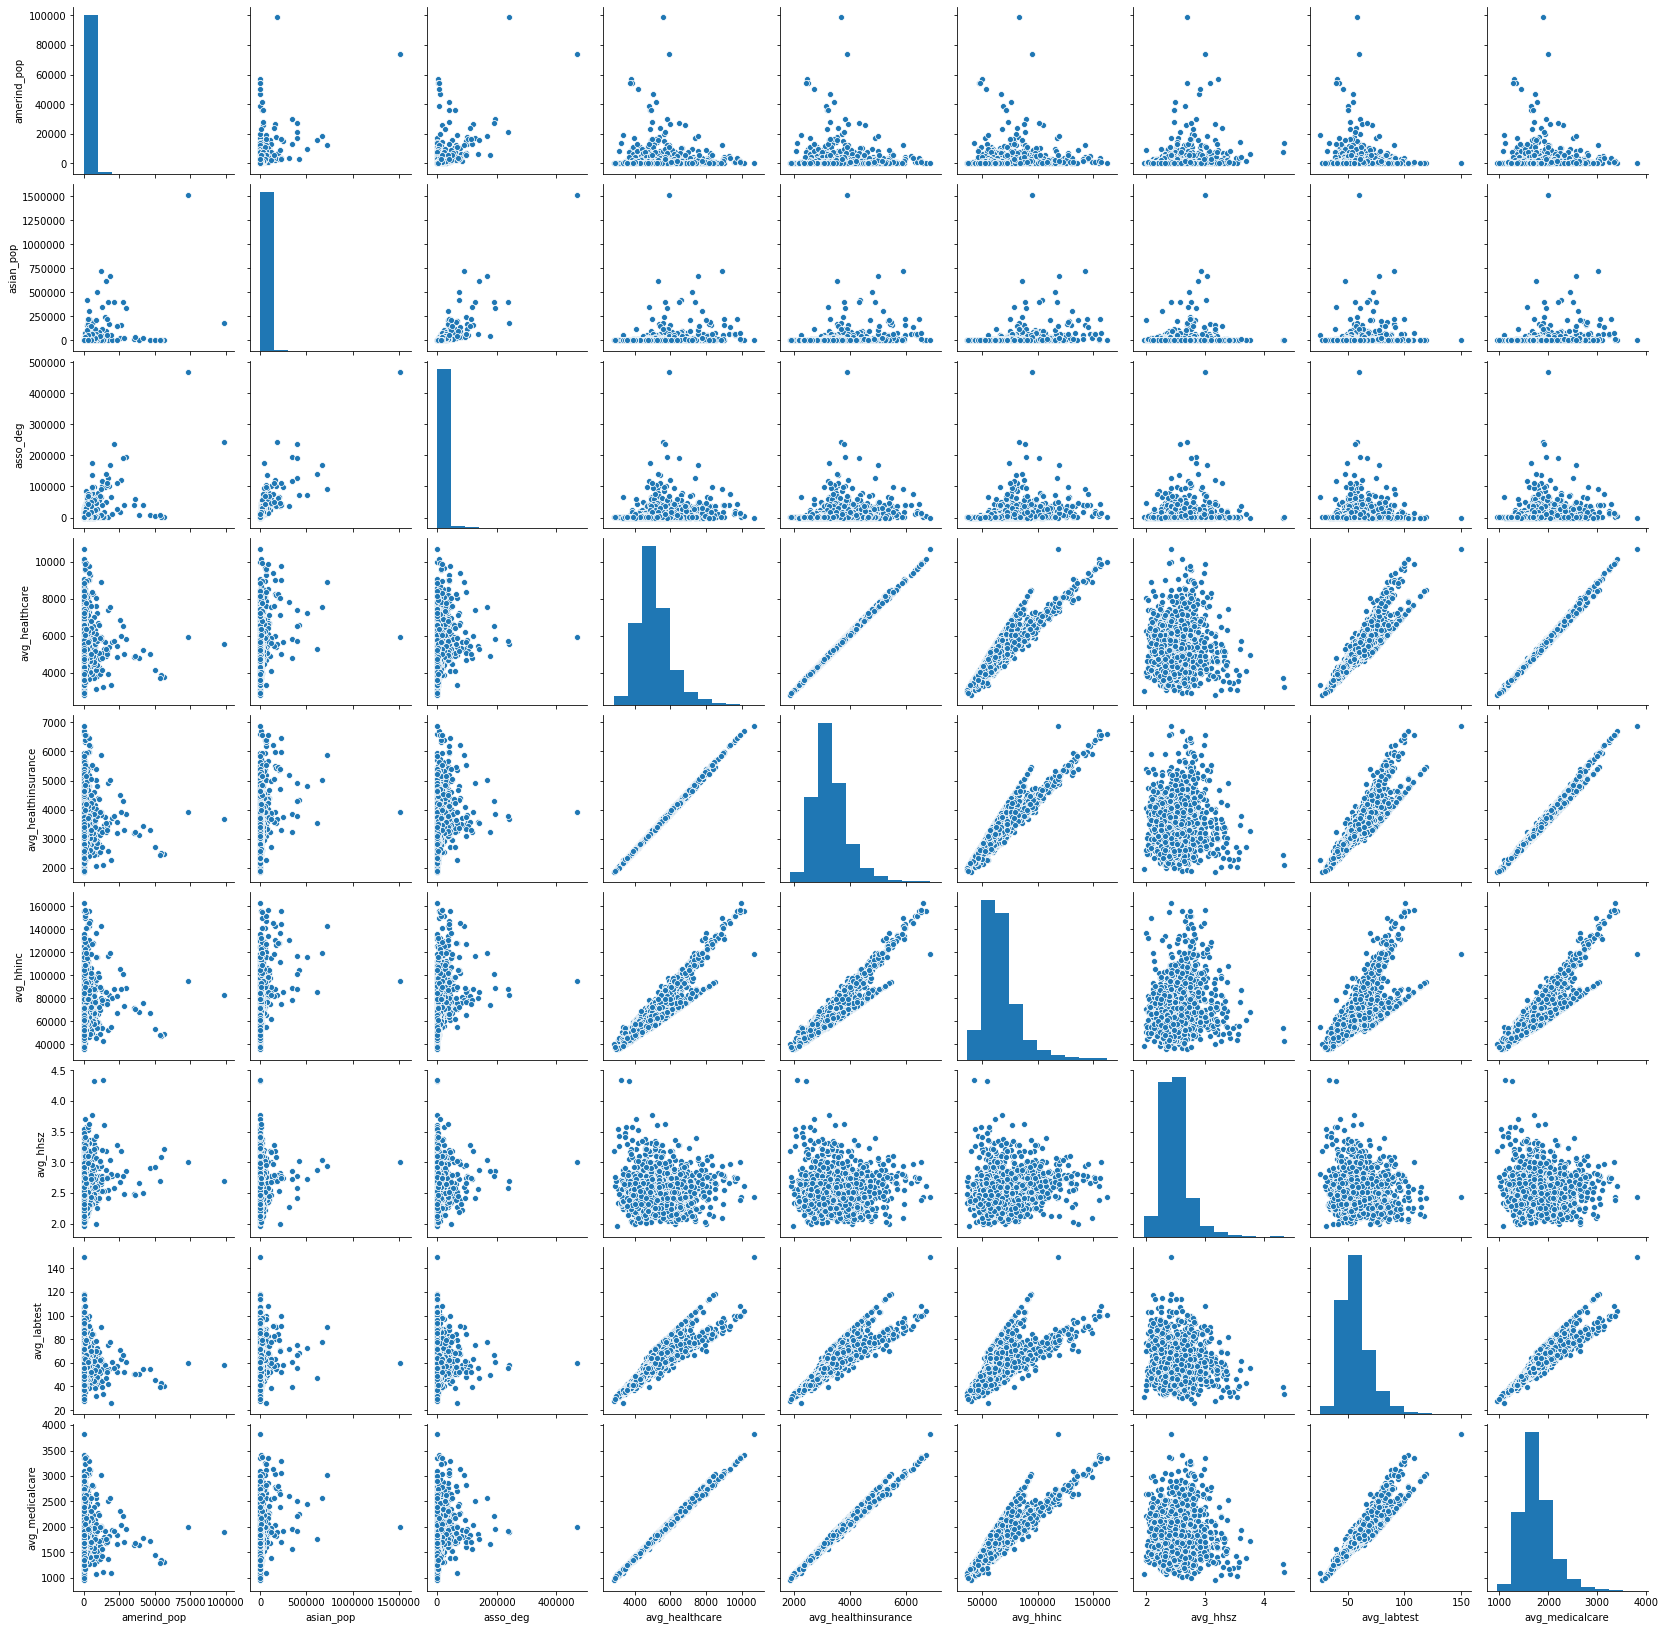

In [13]:
sns.pairplot(test_newcounty_df.iloc[:,0:9])

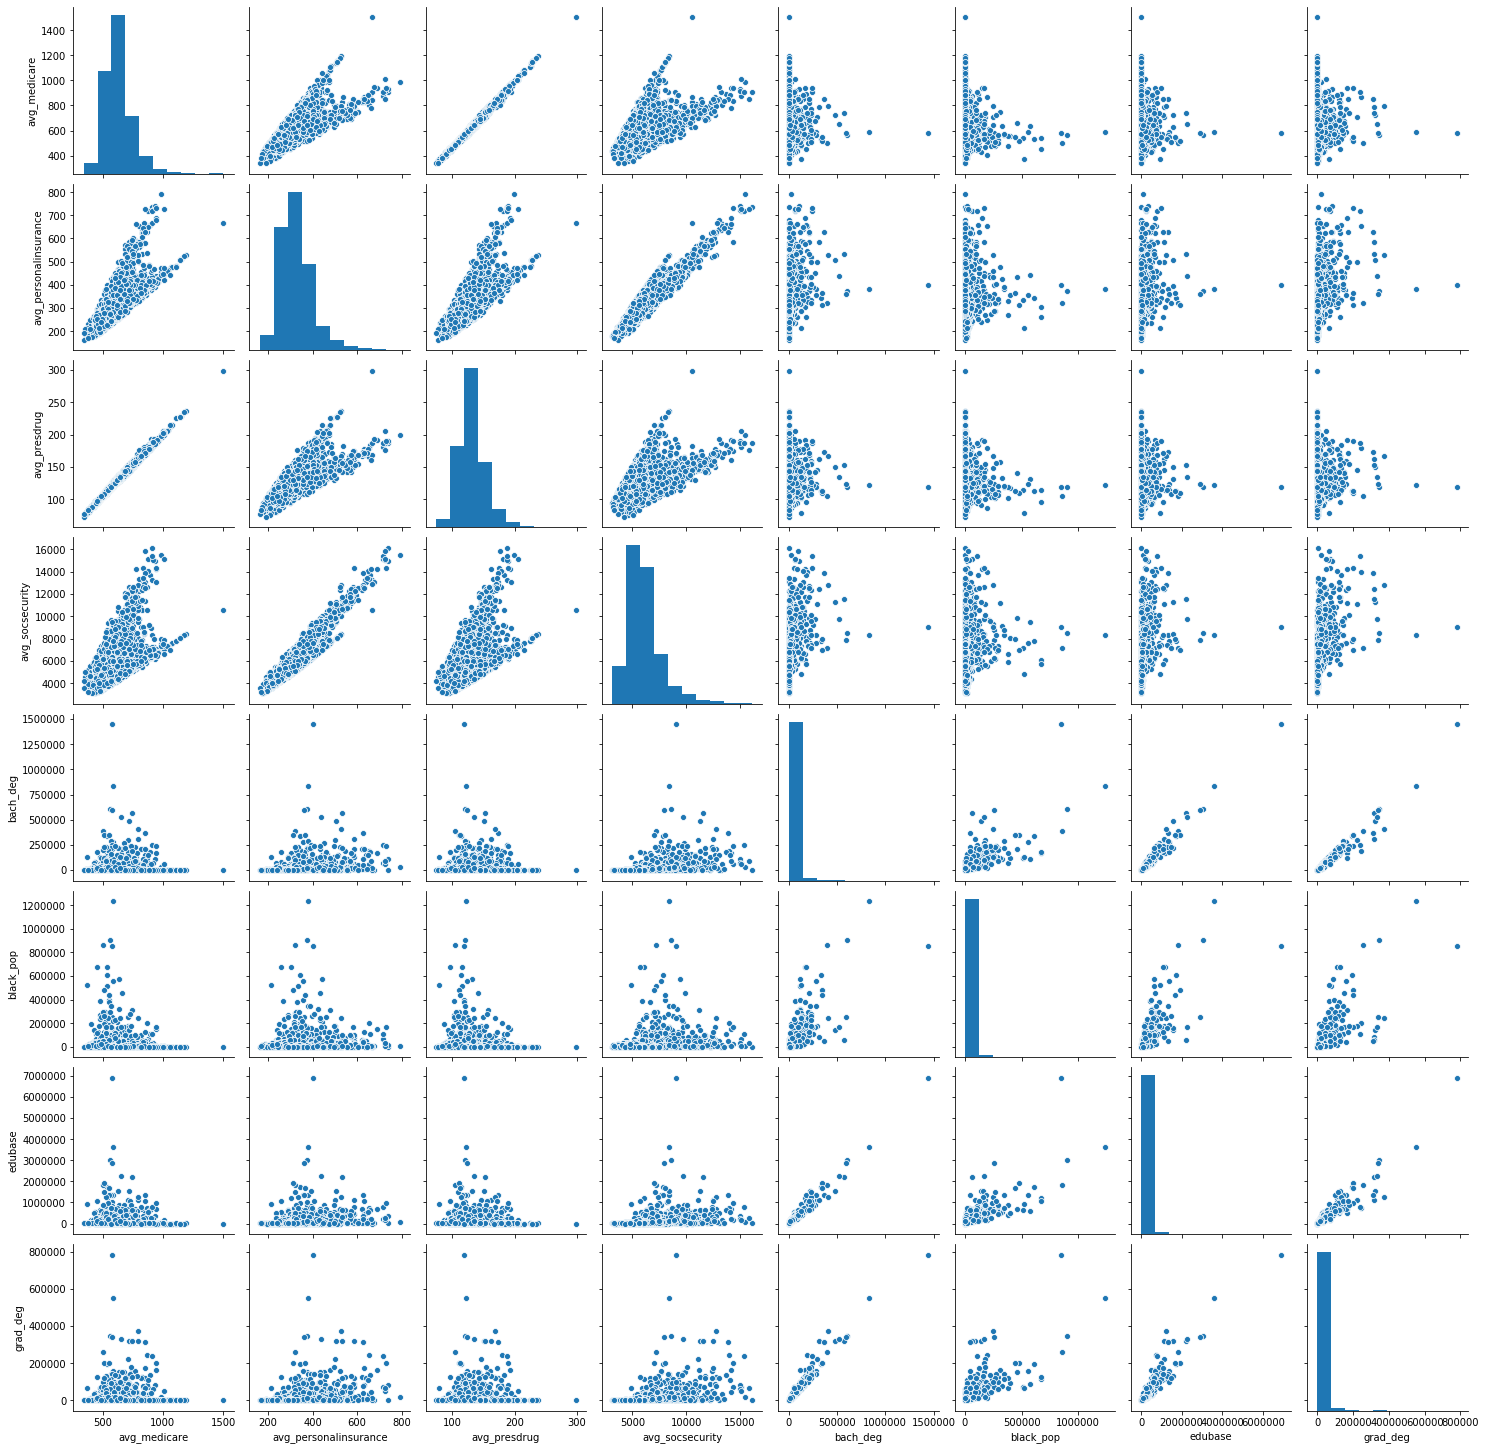

In [14]:
sns.pairplot(test_newcounty_df.iloc[:,10:19])

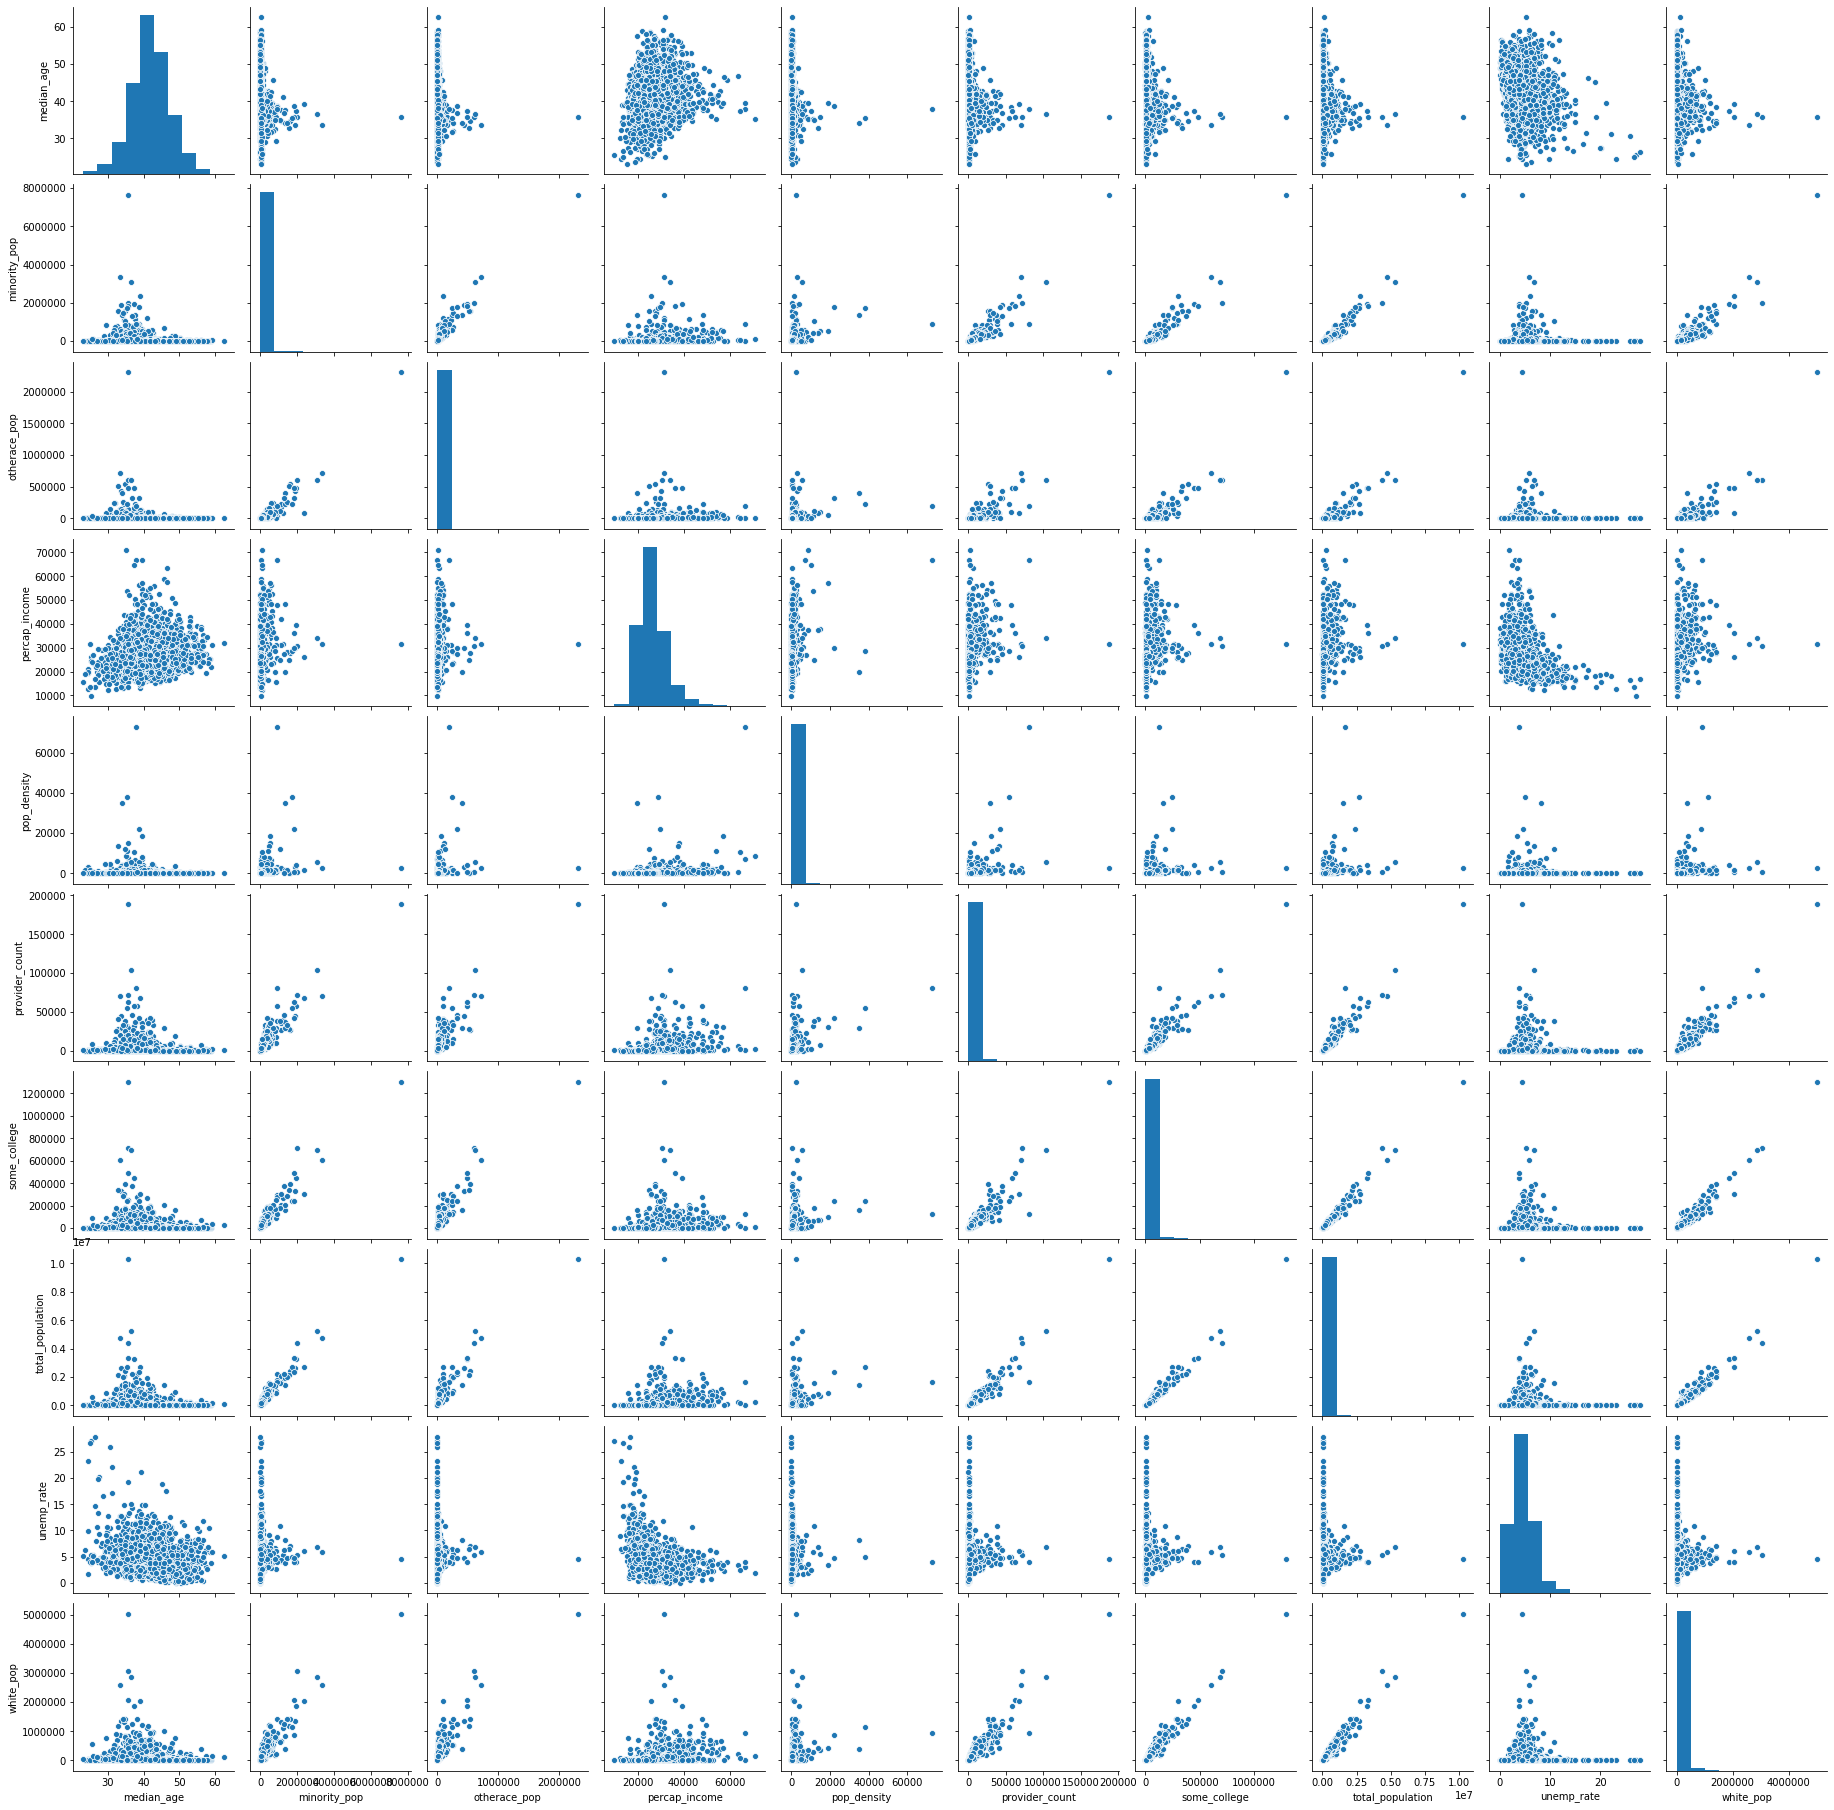

In [15]:
sns.pairplot(test_newcounty_df.iloc[:,20:])

From these pair plots we can see that:
 - Distribution of most variables is heavily right skewed
 - Some variables have outliers that influencing data distribution
 - Most demographic variables are not correlated to other demographic variables
 - Most health expenditure variables seem to be highly correlated to other health expenditure variables

#### Correlation Plot

Correlation plot is another great way to visualize correlation among predictor variables and correlation of predictors with response variable.

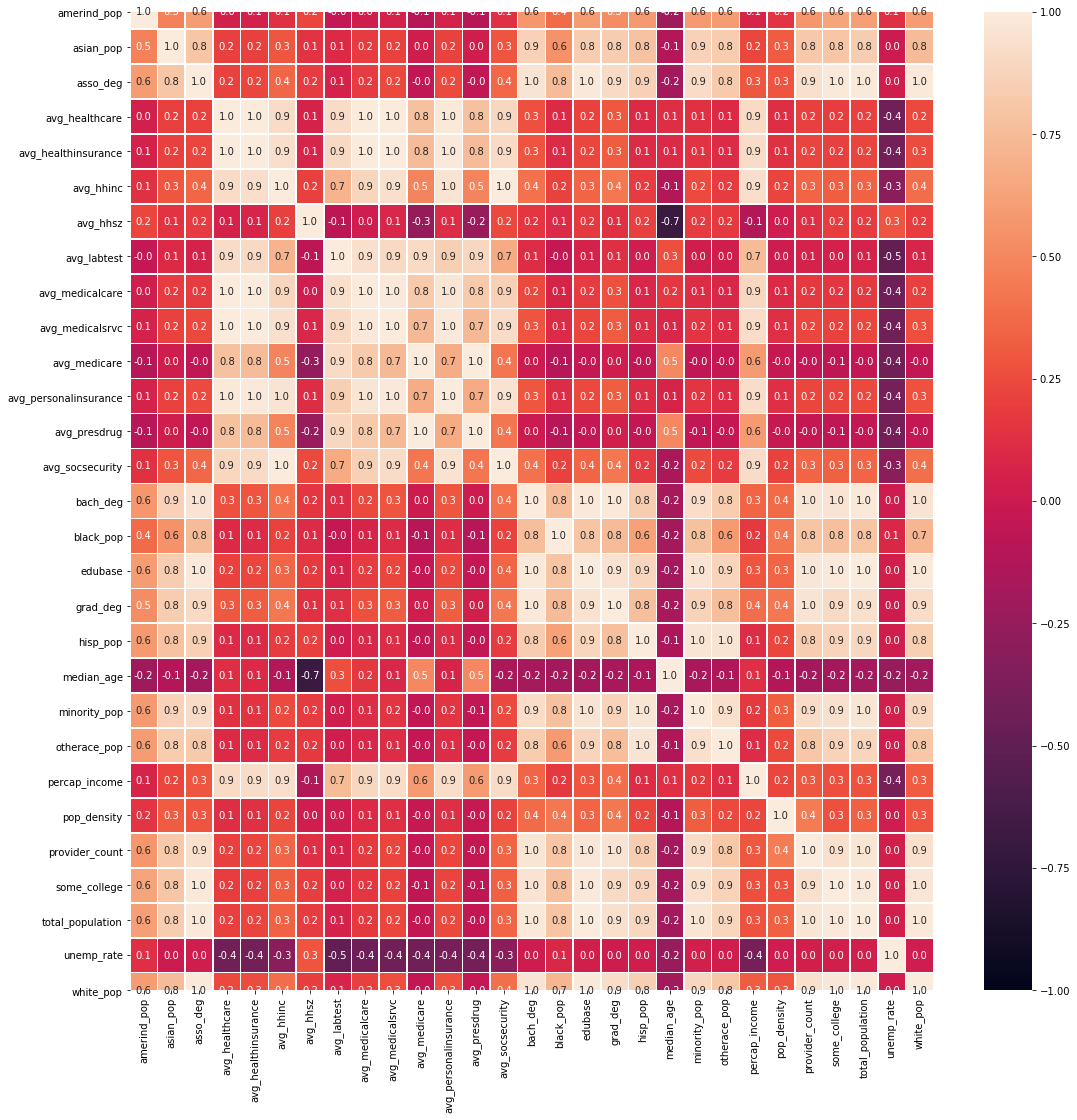

In [23]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(test_newcounty_df.corr(), vmin=-1.0, vmax=1.0, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

From this plot, we can see that:
 - Education level variables are highly correlated with each other.
 - Similarly, health expensiture variables also seem to be highly correlated.

In [41]:
# Sort the values by descending order of Provider Count
test_newcounty_df = test_newcounty_df.sort_values(by=['provider_count'], ascending=False)
test_newcounty_df.head()

amerind_pop  asian_pop  asso_deg  avg_healthcare  avg_healthinsurance  \
1198        73559    1517296    469649         5905.52              3907.44   
2784        21113     395712    237028         5692.87              3774.06   
2459         8756     212844     48360         8035.56              5382.10   
1614        98584     184150    241714         5574.19              3675.76   
1405        30001     341640    193511         5800.32              3840.81   

      avg_hhinc  avg_hhsz  avg_labtest  avg_medicalcare  avg_medicalsrvc  \
1198      94861      3.00        59.76          1998.08          1132.94   
2784      88254      2.58        56.05          1918.81          1061.74   
2459     136860      2.00        69.80          2653.46          1464.96   
1614      83005      2.69        57.84          1898.43          1041.69   
1405      89252      2.85        60.64          1959.50          1087.37   

      avg_medicare  avg_personalinsurance  avg_presdrug  avg_socsecurity  \
1198        579.43                 399.93        118.60          9046.16   
2784        585.60                 381.05        122.50          8356.49   
2459        796.17                 530.01        167.61         12793.70   
1614        581.95                 362.02        123.67          7908.62   
1405        564.48                 374.86        119.69          8547.08   

      bach_deg  black_pop              county  edubase  grad_deg  hisp_pop  \
1198   1445895     850350  Los Angeles County  6899087    782758   5043293   
2784    830433    1233716         Cook County  3607345    552050   1374256   
2459    406878     247085     New York County  1251653    371255    441304   
1614    597653     253576     Maricopa County  2891837    342159   1373153   
1405    605813     901459       Harris County  3029538    345886   2035551   

      median_age  minority_pop  otherace_pop  percap_income  pop_density  \
1198        35.7       7644196       2305030          31563       2535.5   
2784        36.6       3078944        608672          34083       5579.2   
2459        37.9        899778        193191          66805      72736.2   
1614        35.8       1981147        598035          30701        476.9   
1405        33.5       3339578        712410          31405       2780.1   

      provider_count  some_college state  total_population  unemp_rate  \
1198        188179.0       1300786    CA          10288937         4.5   
2784        104037.0        690225    IL           5274129         6.9   
2459         80839.0        121070    NY           1660472         3.9   
1614         71069.0        711033    AZ           4387226         5.3   
1405         70953.0        606842    TX           4735852         5.9   

      white_pop  
1198    5019340  
2784    2859209  
2459     924396  
1614    3066684  
1405    2573473

## Generate a Global Model

<a name="global"></a>
The idea behind a global model is to identify various socioeconomic and demographic factors that influence access to healthcare providers across all counties in the United States.

To build this global model, we will follow a 3 step process:
    1. Build an Ordinary Least Squares (OLS) Regression Model and verify regressions assumptions
    2. Perform Feature Selection using Lasso, Elastic Net and Recursive Feature Elimination techniques
    3. Using selected features, build another OLS model, check performance and verify assumptions

### Create Predictor and Response Variables

In [44]:
# Create prdictor and response variables
train_x = test_newcounty_df.drop(['county','state','provider_count'],axis=1)
train_x.head()

amerind_pop  asian_pop  asso_deg  avg_healthcare  avg_healthinsurance  \
1198        73559    1517296    469649         5905.52              3907.44   
2784        21113     395712    237028         5692.87              3774.06   
2459         8756     212844     48360         8035.56              5382.10   
1614        98584     184150    241714         5574.19              3675.76   
1405        30001     341640    193511         5800.32              3840.81   

      avg_hhinc  avg_hhsz  avg_labtest  avg_medicalcare  avg_medicalsrvc  \
1198      94861      3.00        59.76          1998.08          1132.94   
2784      88254      2.58        56.05          1918.81          1061.74   
2459     136860      2.00        69.80          2653.46          1464.96   
1614      83005      2.69        57.84          1898.43          1041.69   
1405      89252      2.85        60.64          1959.50          1087.37   

      avg_medicare  avg_personalinsurance  avg_presdrug  avg_socsecurity  \
1198        579.43                 399.93        118.60          9046.16   
2784        585.60                 381.05        122.50          8356.49   
2459        796.17                 530.01        167.61         12793.70   
1614        581.95                 362.02        123.67          7908.62   
1405        564.48                 374.86        119.69          8547.08   

      bach_deg  black_pop  edubase  grad_deg  hisp_pop  median_age  \
1198   1445895     850350  6899087    782758   5043293        35.7   
2784    830433    1233716  3607345    552050   1374256        36.6   
2459    406878     247085  1251653    371255    441304        37.9   
1614    597653     253576  2891837    342159   1373153        35.8   
1405    605813     901459  3029538    345886   2035551        33.5   

      minority_pop  otherace_pop  percap_income  pop_density  some_college  \
1198       7644196       2305030          31563       2535.5       1300786   
2784       3078944        608672          34083       5579.2        690225   
2459        899778        193191          66805      72736.2        121070   
1614       1981147        598035          30701        476.9        711033   
1405       3339578        712410          31405       2780.1        606842   

      total_population  unemp_rate  white_pop  
1198          10288937         4.5    5019340  
2784           5274129         6.9    2859209  
2459           1660472         3.9     924396  
1614           4387226         5.3    3066684  
1405           4735852         5.9    2573473

In [45]:
train_y = test_newcounty_df['provider_count']
train_y.head()

1198    188179.0
2784    104037.0
2459     80839.0
1614     71069.0
1405     70953.0
Name: provider_count, dtype: float64

### Create a Base Model
<a name="base"></a>

This is our first model where we will build an Ordinary Least Squares (OLS) Regression Model with all predictors and verify regressions assumptions

In [50]:
# Import libraries
import statsmodels.api as sm
import statsmodels
from statsmodels.regression import linear_model

#### Linear Regression Model using Stats Models

In [51]:
# Create Model
X_train = train_x
X_train = sm.add_constant(X_train) # add constant
sm_ols = sm.OLS(train_y, X_train).fit() 

In [52]:
# Generate model summary
sm_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         provider_count   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     3863.
Date:                Tue, 05 May 2020   Prob (F-statistic):               0.00
Time:                        15:24:38   Log-Likelihood:                -26469.
No. Observations:                3139   AIC:                         5.300e+04
Df Residuals:                    3110   BIC:                         5.317e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2632.0977    840.995      3.130      0.002     983.137    4281.059
amerind_pop              -0.0445      0.009     -5.236      0.000      -0.061      -0.028
asian_pop                -0.0838      0.006    -14.154      0.000      -0.095      -0.072
asso_deg                  0.0251      0.011      2.259      0.024       0.003       0.047
avg_healthcare          468.7517   3996.627      0.117      0.907   -7367.543    8305.047
avg_healthinsurance    -463.0344   3996.586     -0.116      0.908   -8299.249    7373.180
avg_hhinc                 0.2111      0.128      1.647      0.100      -0.040       0.462
avg_hhsz               -134.0568    252.876     -0.530      0.596    -629.878     361.765
avg_labtest            -106.1273     52.970     -2.004      0.045    -209.987      -2.267
avg_medicalcare        -460.9320   3997.058     -0.115      0.908   -8298.073    7376.209
avg_medicalsrvc          -1.7558     14.157     -0.124      0.901     -29.513      26.002
avg_medicare              4.8259     12.003      0.402      0.688     -18.709      28.361
avg_personalinsurance     3.0744      8.394      0.366      0.714     -13.385      19.534
avg_presdrug           -133.4695     64.206     -2.079      0.038    -259.360      -7.579
avg_socsecurity          -4.7149      1.430     -3.297      0.001      -7.519      -1.911
bach_deg                 -0.0004      0.004     -0.091      0.928      -0.009       0.008
black_pop                -0.0576      0.005    -12.104      0.000      -0.067      -0.048
edubase                   0.0574      0.004     16.112      0.000       0.050       0.064
grad_deg                  0.0798      0.005     17.414      0.000       0.071       0.089
hisp_pop                 -0.0880      0.012     -7.570      0.000      -0.111      -0.065
median_age              -52.1251     10.225     -5.098      0.000     -72.174     -32.076
minority_pop              0.0954      0.012      7.895      0.000       0.072       0.119
otherace_pop              0.0370      0.011      3.304      0.001       0.015       0.059
percap_income             0.1126      0.025      4.544      0.000       0.064       0.161
pop_density               0.3258      0.022     15.136      0.000       0.284       0.368
some_college             -0.0116      0.005     -2.309      0.021      -0.021      -0.002
total_population         -0.0610      0.010     -5.978      0.000      -0.081      -0.041
unemp_rate               -1.7981      9.948     -0.181      0.857     -21.304      17.707
white_pop                 0.0323      0.010      3.168      0.002       0.012       0.052
==============================================================================
Omnibus:                     1740.052   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.000   Jarqu

Text(0.5, 1.0, 'Model Coefficients - Base Model')

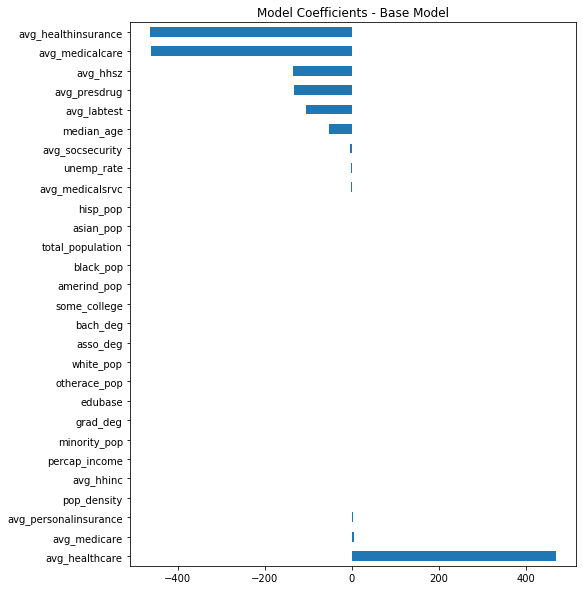

In [53]:
# Plot coefficients picked by model along with their importance
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
sm_ols.params[1:].sort_values(ascending=False).plot(kind='barh')
plt.title('Model Coefficients - Base Model')

In [60]:
# Calculate RMSE of model
from statsmodels.tools.eval_measures import rmse
pred_val = sm_ols.fittedvalues.copy()
rmse_base_ols = rmse(train_y, pred_val)
print('RMSE for Base Model:',round(rmse_base_ols,2))

RMSE for Base Model: 1111.25


> Analysing the model summary, we can see that:
   - The R-squared value of 0.972 shows that 97.2% of the variability in Provider Count is explained by the model. The R-squared value is too good to be true and the model seems to be overfitting.
   - To identify variables that are statistically significant, we look at the p-values of individual variables. Among the coefficients, those that are statistically significant at 10% significance level are:  
   - asian_pop, amerind_pop, black_pop, edubase, hisp_pop, median_age, minority_pop, otherace_pop, percap_income, pop_density, white_pop, some_college, asso_deg, grad_deg, total_population, avg_labtest, avg_presdrug, avg_socsecurity.
   - The p-value of F-statistic is less than 0.05 which shows that atleast one of the predicting variables has predicting power on the variability of Provider Count.

#### Verify Assumptions

Here we will verify regression assumtions of:
 - Linearity
 - Independence
 - Normality
 - Equal Variance

In [61]:
# Get residual value
residual = sm_ols.resid

((array([-3.513895, -3.270949, -3.136642, -3.042526, ...,  3.042526,  3.136642,  3.270949,  3.513895]),
  array([-11726.97859 , -11413.441095,  -9997.061884,  -9433.011487, ...,  10229.735878,  10430.714878,  12466.348803,
          17821.165958])),
 (804.0708867868918, 2.4774004906596078e-08, 0.7228437398901398))

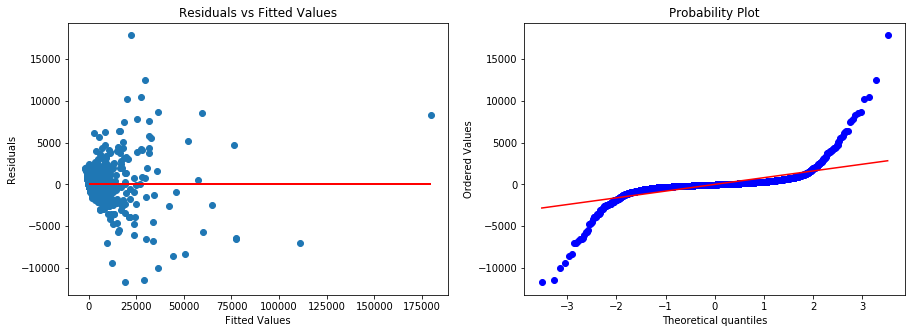

In [62]:
import scipy as sp
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

# Residuals vs Fitted
ax1.scatter(pred_val, residual)
ax1.hlines(y=0, xmin=0, xmax=max(pred_val), linewidth=2, color='r')
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted Values')

# QQ plot
sp.stats.probplot(residual, plot=ax2, fit=True)

1. Residuals vs Fitted plot
    - **Constant Variance**: From the plot, we observe a departure from constant variance as the distance of data points from zero are not consistently equal. We can see that the residuals are closer to 0 in the beggining but values start to go up as we move a little towards the right of the plot.
    - **Independence**:  We see that the data is clustered together and is not randomly distributed. This indicates a departure from independence as clusters of residuals generally indicate correlation errors, or an indication that multicollinearity exists in parts of the data.


2. Probability Plot
    - **Normality**: From this plot, we can see that the residuals have tails on both the positive and negative side. Although the residuals stay close to the zero line they are heavily tailed showing violation of Normality assumption.


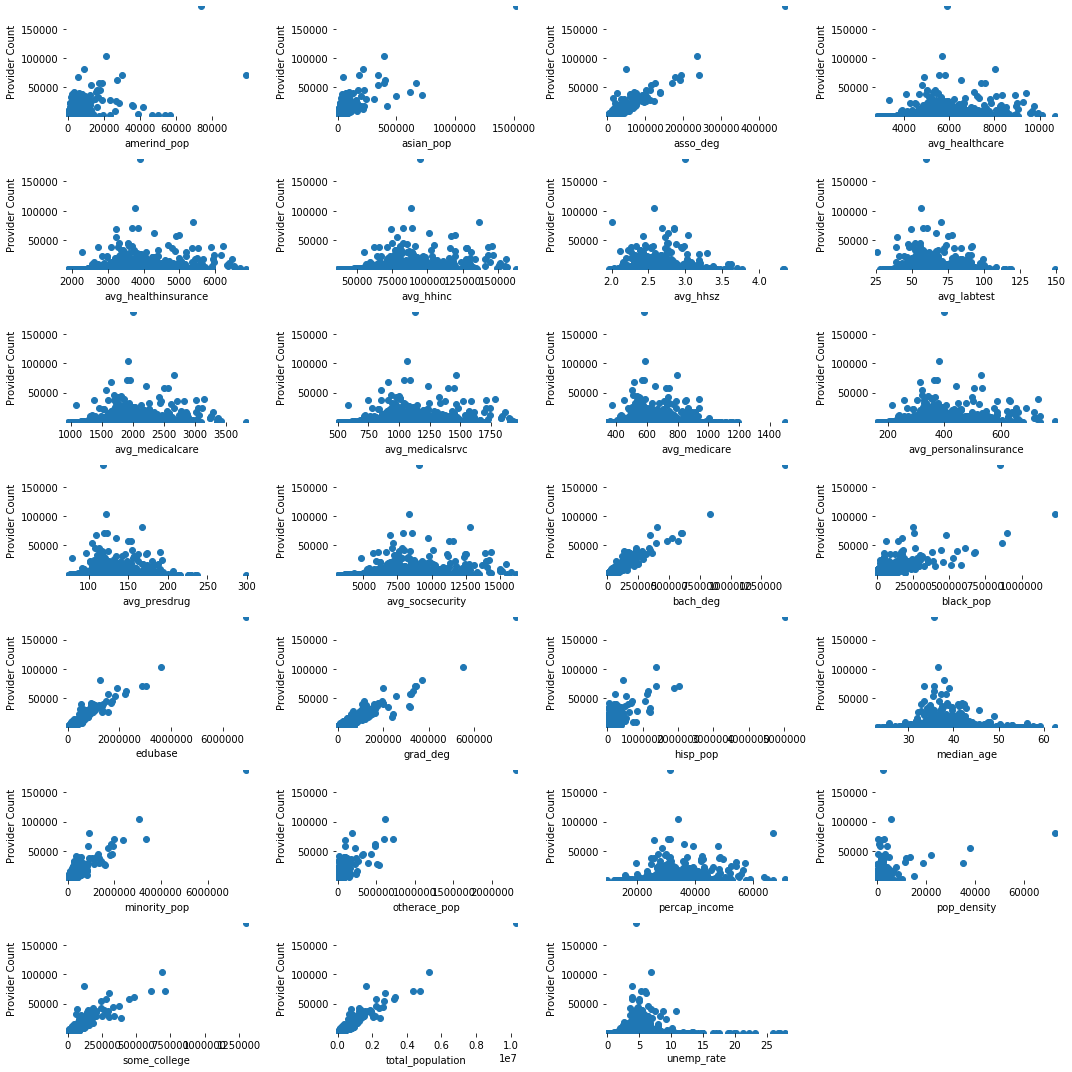

In [65]:
# Check Linearity - Plot predictors with response
states = train_x.columns
fig = plt.figure(figsize=(15, 15))
for sp in range(0,27):
    ax = fig.add_subplot(7,4,sp+1)
    ax.scatter(train_x.loc[:,states[sp]], train_y)
    ax.set_xlabel(states[sp])
    ax.set_ylabel('Provider Count')
    plt.xticks(rotation=0)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.margins(0.01, 0)
plt.tight_layout() # automatically adjusts layout to fit long labels
plt.show()

1. Predictors vs Response
     - **Linearity** - From the plot above, we can see the each predictor variable is either strongly or weakly related to response variable. From this plot, we can say that the Linearity assumption holds.

#### Outlier Detection

One way to think about whether the results we have are driven by a given data point is to calculate how far the predicted values for data would move if model was fit without the data point in question. This calculated total distance is called Cook's distance. Cook's D is a function of the leverage and standardized residual associated with each data point. The influence of each point can be visualized using an Influence Plot.

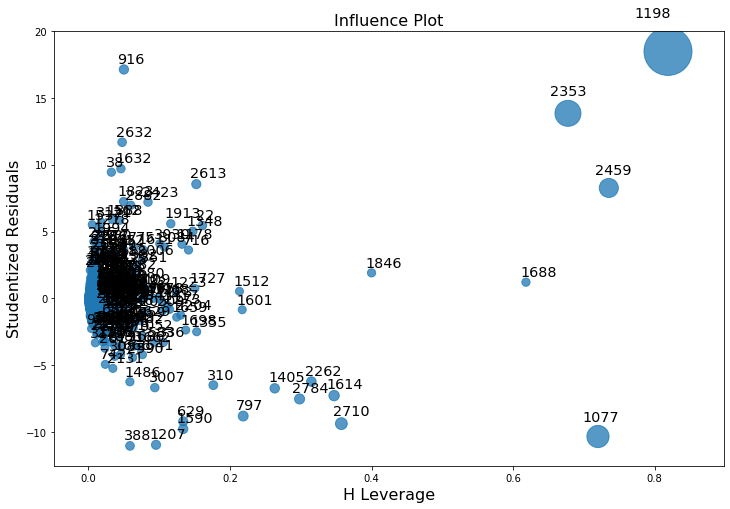

In [66]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(sm_ols, ax= ax, criterion="cooks")

From this plot, we can see that points towards the right have high leverage and higher than average residuals. The size of points like 1198, 2353 is large indicating these are influential points. Points like 916 do not have a high leverage but very high residual and are considered outliers.

#### Remove Outliers

Removing outliers is an iterative process and outliers need to be investigated before removal. Here, we followed a 4-step process to remove outliers as follows:
1. Remove initial outliers based on Influence Plot
2. Rerun the model with data after removing outliers
3. Plot predictors with response to see outliers in each predictor
4. Repeat the process above until you see satisfactory results

The outliers were removed in different iterations. Here are the obervations that were removed with each iteration:
    - Iteration 1: 198,2353,2459,1077,1688
    - Iteration 2: 2262,1614,916,2710,1846,2784,1601,1405
    - Iteration 3: 1512,1727,2204,2613,1178,2632,797,1590,1052
    - Iteration 4: 716,209,583,1348,1913,1355,310,1207,388,2423
    - Iteration 5: 1659,1698,629,2646,1632,38
    
The code below shows all outliers being removed.

In [67]:
# Remove Outliers
global_df = test_newcounty_df.copy()

global_df.drop([1198,2353,2459,1077,1688,2262,1614,916,2710,1846,2784,1601,1405,1512,1727,2204,2613,
               1178,2632,797,1590,1052,716,209,583,1348,1913,1355,310,1207,388,2423,1659,1698,629,
               2646,1632,38], axis=0, inplace=True)

In [68]:
global_df.shape

(3101, 31)

In [69]:
global_df.columns

Index(['amerind_pop', 'asian_pop', 'asso_deg', 'avg_healthcare',
       'avg_healthinsurance', 'avg_hhinc', 'avg_hhsz', 'avg_labtest',
       'avg_medicalcare', 'avg_medicalsrvc', 'avg_medicare',
       'avg_personalinsurance', 'avg_presdrug', 'avg_socsecurity', 'bach_deg',
       'black_pop', 'county', 'edubase', 'grad_deg', 'hisp_pop', 'median_age',
       'minority_pop', 'otherace_pop', 'percap_income', 'pop_density',
       'provider_count', 'some_college', 'state', 'total_population',
       'unemp_rate', 'white_pop'],
      dtype='object')

##### Re-run Model

In [70]:
# Create prdictor and response variables
train_x_rerun = global_df.drop(['county','state','provider_count'],axis=1)
train_y_rerun = global_df['provider_count']
train_x_rerun.head()

amerind_pop  asian_pop  asso_deg  avg_healthcare  avg_healthinsurance  \
22           7296      61221     98936         4689.91              3086.87   
3030         5873      63150     97865         8357.34              5537.92   
1823         3139      69531     59352         5092.24              3363.94   
382          1861      49510     85068         5651.21              3719.02   
775         10369      95783     78418         6679.58              4417.10   

      avg_hhinc  avg_hhsz  avg_labtest  avg_medicalcare  avg_medicalsrvc  \
22        65667      2.53        48.09          1603.03           855.71   
3030     127434      2.95        84.12          2819.42          1593.74   
1823      76679      2.39        52.43          1728.29           945.65   
382       80920      2.22        57.87          1932.19          1042.79   
775      102411      2.39        67.75          2262.48          1249.32   

      avg_medicare  avg_personalinsurance  avg_presdrug  avg_socsecurity  \
22          537.30                 304.12        114.89          6106.46   
3030        848.71                 629.87        172.25         12508.96   
1823        522.90                 328.65        110.91          7257.97   
382         634.30                 377.02        133.94          7618.78   
775         677.71                 449.33        142.25          9795.97   

      bach_deg  black_pop  edubase  grad_deg  hisp_pop  median_age  \
22      170261     675982  1200479    112071    108064        38.8   
3030    207071     121952  1060001    173811    305129        41.3   
1823    214996     296185   849022    124594     72525        34.9   
382     219168     165407   891439    151997     27470        42.7   
775     268077     166746   862362    151277     88522        37.4   

      minority_pop  otherace_pop  percap_income  pop_density  some_college  \
22          891604         37661          25903       2887.9        294896   
3030        507258        103330          42729       1660.4        181490   
1823        480330         34855          31611       2431.7        170169   
382         271073          6977          35858       1693.9        142060   
775         398050         44229          42224       2269.8        161014   

      total_population  unemp_rate  white_pop  
22             1767643         8.7     932737  
3030           1514342         5.3    1175867  
1823           1294124         4.5     843065  
382            1236649         5.5     982008  
775            1256560         3.9     893165

In [71]:
# Run Model
X_train_rerun = train_x_rerun
X_train_rerun = sm.add_constant(X_train_rerun)
global_ols_rerun = sm.OLS(train_y_rerun, X_train_rerun).fit() 
residual = global_ols_rerun.resid

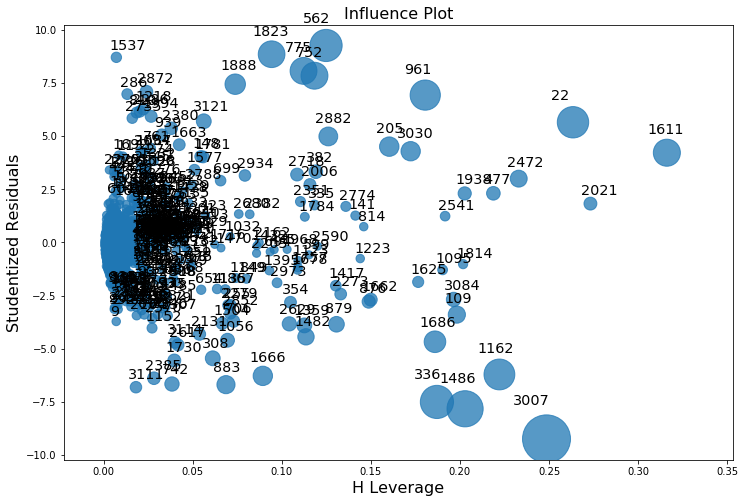

In [72]:
# Plot Outliers
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(global_ols_rerun, ax= ax, criterion="cooks")

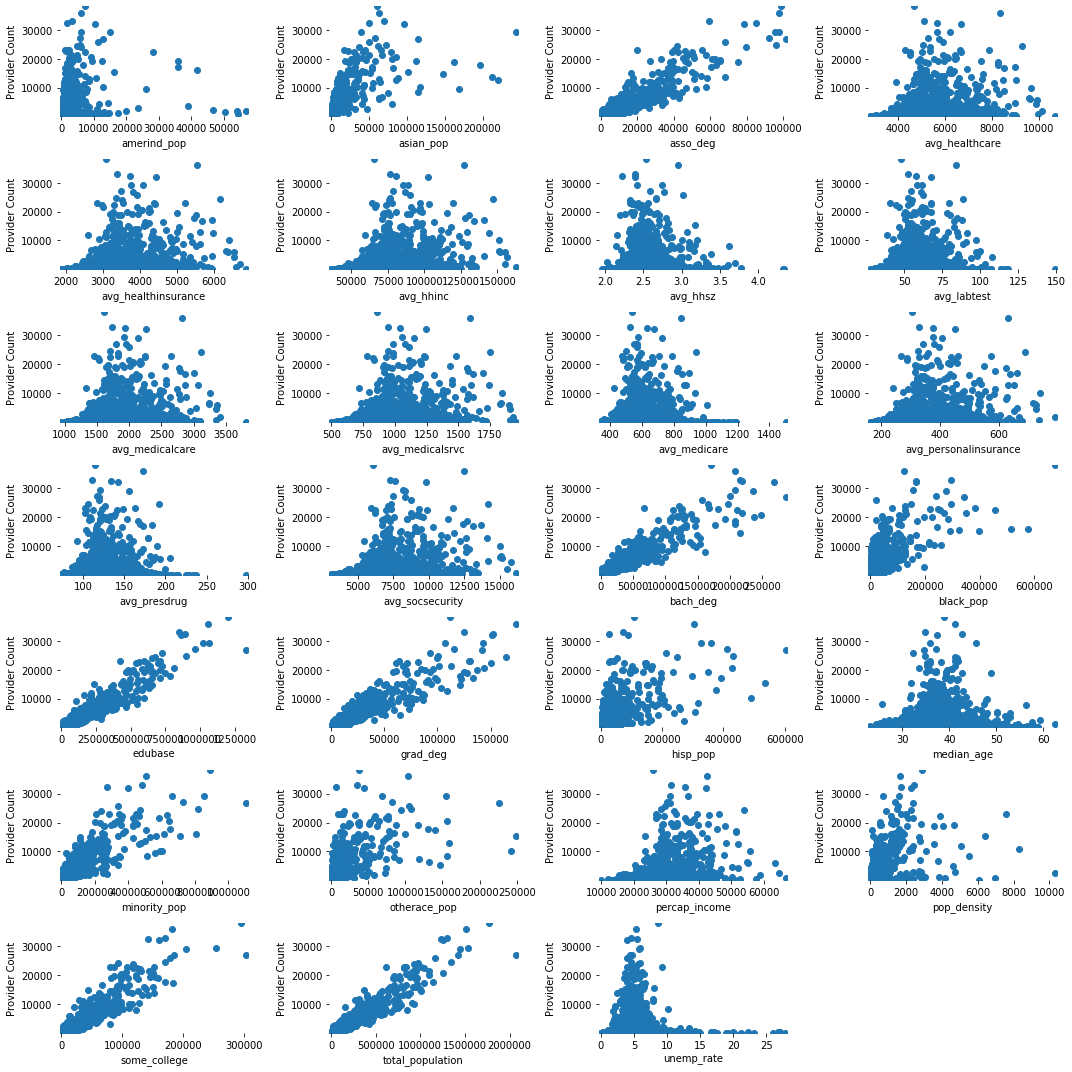

In [73]:
# Check Linearity - Plot predictors with response
states = train_x_rerun.columns
fig = plt.figure(figsize=(15, 15))
for sp in range(0,27):
    ax = fig.add_subplot(7,4,sp+1)
    ax.scatter(train_x_rerun.loc[:,states[sp]], train_y_rerun)
    ax.set_xlabel(states[sp])
    ax.set_ylabel('Provider Count')
    plt.xticks(rotation=0)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.margins(0.01, 0)
plt.tight_layout() # automatically adjusts layout to fit long labels
plt.show()

### Feature Selection and Importance

<a name="feature"></a>
Our regression model results showed only few predictors that were statistically significant in predicting provider count. Feature selection is used to select those features in data that contribute most to the response variable. Having irrelevant features in the data can decrease the accuracy of many models, especially linear algorithms. To identify which predictors play a key role and remove predictors that are not statistically significant, we can use various feature selection techniques.

Greedy algorithms like `Stepwise Regression` and `Recursive Feature Elimination (RFE)` work by adding or removing attributes one at a time and building a model on those attributes that remain. RFE algorithm recursively removes attributes and uses accuracy metric to rank the feature according to their importance.

Regularization methods like `Lasso` and `ElasticNet` seek to minimize the complexity (magnitude  and  number  of  regression  coefficients) of the model by penalizing a feature given a coefficient threshold.
 - LASSO penalizes the sum of absolute value of regression coefficients thereby forcing many coefficients to 0.
 
 - ElasticNet combines the properties of both LASSO and Ridge regression.  It penalizes the model by using both the L2-norm (sum of squared values of coefficients) and the L1-norm (sum of absolute value of coefficients) thereby shrinking some coefficients closer to 0 to reduce variance and making other coefficients 0.
 
Feature importance techniques like `Random Forest` are used to select features using a trained supervised classifier. Random forest consists of a number of decision trees where each node in a tree is a condition on a single feature, designed to split the dataset.

Here we will:
 - Run some feature selection algorithms
 - Choose an algorithm with lowest error
 - Run the chosen algorithm on all predictors
 - Choose the predictors selected by this model for further analysis

In [74]:
# Create prdictor and response variables
train_x_global = train_x_rerun
train_y_global = train_y_rerun
train_x_global.head()

amerind_pop  asian_pop  asso_deg  avg_healthcare  avg_healthinsurance  \
22           7296      61221     98936         4689.91              3086.87   
3030         5873      63150     97865         8357.34              5537.92   
1823         3139      69531     59352         5092.24              3363.94   
382          1861      49510     85068         5651.21              3719.02   
775         10369      95783     78418         6679.58              4417.10   

      avg_hhinc  avg_hhsz  avg_labtest  avg_medicalcare  avg_medicalsrvc  \
22        65667      2.53        48.09          1603.03           855.71   
3030     127434      2.95        84.12          2819.42          1593.74   
1823      76679      2.39        52.43          1728.29           945.65   
382       80920      2.22        57.87          1932.19          1042.79   
775      102411      2.39        67.75          2262.48          1249.32   

      avg_medicare  avg_personalinsurance  avg_presdrug  avg_socsecurity  \
22          537.30                 304.12        114.89          6106.46   
3030        848.71                 629.87        172.25         12508.96   
1823        522.90                 328.65        110.91          7257.97   
382         634.30                 377.02        133.94          7618.78   
775         677.71                 449.33        142.25          9795.97   

      bach_deg  black_pop  edubase  grad_deg  hisp_pop  median_age  \
22      170261     675982  1200479    112071    108064        38.8   
3030    207071     121952  1060001    173811    305129        41.3   
1823    214996     296185   849022    124594     72525        34.9   
382     219168     165407   891439    151997     27470        42.7   
775     268077     166746   862362    151277     88522        37.4   

      minority_pop  otherace_pop  percap_income  pop_density  some_college  \
22          891604         37661          25903       2887.9        294896   
3030        507258        103330          42729       1660.4        181490   
1823        480330         34855          31611       2431.7        170169   
382         271073          6977          35858       1693.9        142060   
775         398050         44229          42224       2269.8        161014   

      total_population  unemp_rate  white_pop  
22             1767643         8.7     932737  
3030           1514342         5.3    1175867  
1823           1294124         4.5     843065  
382            1236649         5.5     982008  
775            1256560         3.9     893165

In [75]:
# Import Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

#### Run Feature Selection Algorithms

In [76]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring ='neg_mean_squared_error'

In [77]:
# Create Pipeline and Standardize the dataset
clf = LinearRegression()
pipelines = []
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',Lasso(max_iter=10000))])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('ScaledRFECV', Pipeline([('Scaler', StandardScaler()),('RFECV',RFECV(estimator=clf, cv=5))])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',RandomForestRegressor(n_estimators = 100))])))

In [81]:
# Run models
import math
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, train_x_global, train_y_global, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, math.sqrt(abs(cv_results.mean())), cv_results.std())
    print(msg)

ScaledLASSO: 772.430591 (219099.222711)
ScaledEN: 913.769862 (283628.318649)
ScaledRFECV: 780.305975 (202146.603284)
ScaledRF: 797.004853 (220454.762883)


From the results above, Lasso seems to be the most promising with lowest RMSE. Let's explore Lasso to see which variables are selected by this model.

#### Identify Features Using Lasso

In [82]:
# Standardize the data using Standard Scalar
from sklearn.preprocessing import StandardScaler
sc_data = StandardScaler()
train_x_std = sc_data.fit_transform(train_x_global)

In [83]:
# Run Lasso Model
from sklearn.linear_model import Lasso
# from sklearn.linear_model import ElasticNet
lasso_model=Lasso(max_iter=10000)
lasso_model.fit(train_x_std,train_y_global)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [84]:
# Identify how many variables are picked
coef = pd.Series(lasso_model.coef_, index = train_x.columns)
print("Model picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Model picked 20 variables and eliminated the other 8 variables


In [85]:
# Get important variables and their coefficients
imp_coef = pd.concat([coef.sort_values(ascending=False).head(10),
                     coef.sort_values(ascending=False).tail(10)])
imp_coef

minority_pop        4534.125051
grad_deg            2294.397277
total_population    1567.086062
percap_income        645.805387
avg_medicare         521.998425
asso_deg             476.539805
edubase              456.798192
otherace_pop         193.585007
pop_density          116.099396
avg_hhsz              28.619174
unemp_rate           -39.235489
amerind_pop          -77.273334
some_college        -137.307626
median_age          -183.809645
avg_presdrug        -483.900192
avg_socsecurity     -906.203708
asian_pop          -1090.952623
bach_deg           -1243.030708
black_pop          -1982.364241
hisp_pop           -2512.865717
dtype: float64

Text(0.5, 1.0, 'Coefficients in the Model')

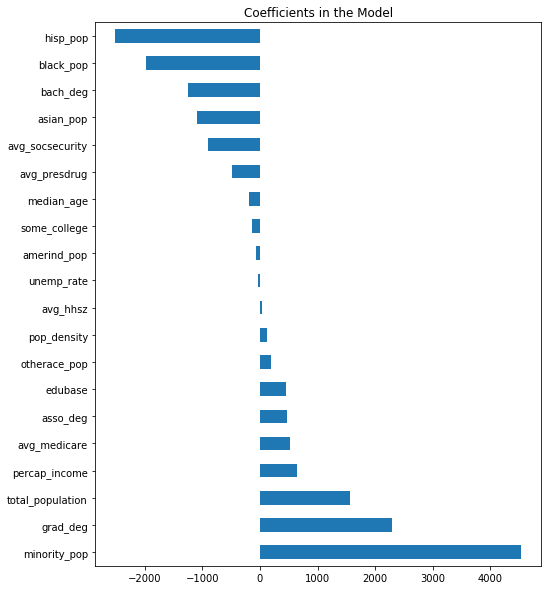

In [86]:
# Plot coefficients picked by model along with their importance
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Model")

From the analysis above, we can see that factors that are predictive of higher provider count are:
- minority_pop (2018 Minority Population (Esri))
- grad_deg (2018 Education: Graduate/Professional Degree (Esri))
- total_population (2018 Total Population (Esri))
- percap_income (2018 Per Capita Income (Esri))
- avg_medicare (2019 Medicare Payments: Average)
- asso_deg (2018 Education: Associate's Degree (Esri))
- edubase (2018 Educational Attainment Base (Esri))
- otherace_pop (2018 Other Race Population by Age Base (Esri))
- pop_density (2018 Population Density (Pop per Square Mile) (Esri))
- avg_hhsz (2018 Average Household Size (Esri))

Factors that negatively influence provider count are:
- hisp_pop (2018 Hispanic Population (Esri))
- black_pop (2018 Black/African American Population (Esri))
- bach_deg (2018 Education: Bachelor's Degree (Esri))
- asian_pop (2018 Asian Population (Esri))
- avg_socsecurity (2019 Pensions & Social Security: Average)
- avg_presdrug (2019 Prescription Drugs: Average)
- median_age (2018 Median Age (Esri))
- some_college (2018 Education: Some College/No Degree (Esri))
- amerind_pop (2018 American Indian/Alaska Native Population (Esri))
- unemp_rate (2018 Unemployment Rate (Esri))

### Regression with Selected Features

<a name="reg"></a>
In the base model, we saw deviations from linearity, constant variance and independence assumptions. The model also seemed to overfit data with an R-squared value of 0.97. 

__For Linearity__ - If a model does not fit well, it does not mean that the regression is not useful. One problem could be that the relation between one or more predictors and the response is not linear.

__For Constant Variance and Independence__ - If normality or the constant variance do not hold, then we transform the response variable. A common transformation is the power transformation of y to the lambda, also called the Box-Cox transformation.

Here we will use the features selected by lasso model, and transform both the predictor and response to create a regression model on our data.

#### Clean the Data
Some transformations such as `log` do not work well with zero or negative values. We do not have any negatives but let's check and remove any zero values from the data.

In [101]:
# Create a copy of dataframe
test_log = global_df.copy()
test_log.shape

(3101, 31)

In [102]:
# Describe to identify any zero values in dataset
test_log.describe().transpose()

count          mean            std       min  \
amerind_pop            3101.0    864.783618    3068.730232      0.00   
asian_pop              3101.0   3043.151242   13248.037233      0.00   
asso_deg               3101.0   4915.803612    9843.448716      5.00   
avg_healthcare         3101.0   5074.480206     943.178634   2821.51   
avg_healthinsurance    3101.0   3315.863167     621.884213   1871.50   
avg_hhinc              3101.0  66002.362786   15607.249326  36078.00   
avg_hhsz               3101.0      2.482086       0.215989      1.96   
avg_labtest            3101.0     57.210451      12.361968     27.75   
avg_medicalcare        3101.0   1758.617036     322.920403    950.01   
avg_medicalsrvc        3101.0    925.907240     185.229135    496.89   
avg_medicare           3101.0    628.323805     110.378592    342.05   
avg_personalinsurance  3101.0    326.426227      74.473635    162.69   
avg_presdrug           3101.0    131.257604      21.018558     73.65   
avg_socsecurity        3101.0   6100.321019    1629.551953   3121.71   
bach_deg               3101.0  10485.605611   26386.076833      2.00   
black_pop              3101.0  10189.781683   36295.673303      0.00   
edubase                3101.0  55521.614963  113847.015134     69.00   
grad_deg               3101.0   6346.259594   16755.744154      0.00   
hisp_pop               3101.0  10626.053531   37604.683153      0.00   
median_age             3101.0     41.988746       5.352596     23.20   
minority_pop           3101.0  26255.754273   77293.487317      4.00   
otherace_pop           3101.0   4068.765882   14823.385839      0.00   
percap_income          3101.0  26313.777814    6023.207001   9853.00   
pop_density            3101.0    182.966978     545.774159      0.00   
provider_count         3101.0   1335.950661    3396.194362      1.00   
some_college           3101.0  11695.798452   23569.596556     22.00   
total_population       3101.0  81252.510803  167916.707800     82.00   
unemp_rate             3101.0      4.614060       2.549695      0.00   
white_pop              3101.0  60463.374718  114397.216362     65.00   

                            25%       50%       75%         max  
amerind_pop               61.00    159.00    515.00    56871.00  
asian_pop                 48.00    160.00    785.00   244129.00  
asso_deg                 645.00   1583.00   4381.00   101287.00  
avg_healthcare          4436.31   4925.09   5557.76    10690.41  
avg_healthinsurance     2898.90   3221.31   3628.93     6873.42  
avg_hhinc              55820.00  63394.00  72034.00   162801.00  
avg_hhsz                   2.35      2.46      2.57        4.34  
avg_labtest               49.01     54.78     63.12      149.41  
avg_medicalcare         1540.78   1704.85   1920.15     3816.99  
avg_medicalsrvc          799.94    896.82   1020.43     1955.37  
avg_medicare             557.34    610.37    681.85     1501.33  
avg_personalinsurance    276.30    315.11    361.80      791.45  
avg_presdrug             117.91    128.37    141.71      298.34  
avg_socsecurity         5049.80   5807.61   6708.96    16133.33  
bach_deg                 846.00   2102.00   6404.00   285839.00  
black_pop                120.00    821.00   5462.00   675982.00  
edubase                 7873.00  18310.00  46161.00  1334604.00  
grad_deg                 418.00   1124.00   3687.00   173811.00  
hisp_pop                 376.00   1113.00   5102.00   602482.00  
median_age                38.80     41.90     45.20       62.50  
minority_pop            1265.00   4426.00  14874.00  1106776.00  
otherace_pop             108.00    416.00   1934.00   248928.00  
percap_income          22211.00  25451.00  29223.00    66766.00  
pop_density               16.90     45.20    112.90    10328.30  
provider_count            87.00    259.00    908.00    38175.00  
some_college            1661.00   3821.00  10023.00   303602.00  
total_population       11197.00  26033.00  67011.00  2071433.00  
unemp_rate     

We can see that the minimum for asian, black population and some other variables is 0. Let's find out the observations with these zero values and remove them.

In [103]:
# Find observations that have 0 values
state_list = ['asian_pop','black_pop','amerind_pop','hisp_pop','otherace_pop','pop_density','unemp_rate','grad_deg']
x = test_log[(test_log[state_list] == 0).any(axis=1)]
x.shape

(50, 31)

We can see that 50 out of 3101 observations have 0 values. We will go ahead and remove these.

Replace 0 values with Nan and then drop those values

In [105]:
# Replace 0 with NaN for columns in state_list
test_log[state_list] = test_log[state_list].replace({0:np.nan})
test_log.dropna(inplace=True)
test_log.shape

(3051, 31)

In [106]:
test_log.describe().transpose()

count          mean            std       min  \
amerind_pop            3051.0    876.815143    3091.472766      1.00   
asian_pop              3051.0   3092.947230   13350.425949      1.00   
asso_deg               3051.0   4994.676827    9904.334750      5.00   
avg_healthcare         3051.0   5066.632448     934.090435   2821.51   
avg_healthinsurance    3051.0   3311.393602     616.772198   1871.50   
avg_hhinc              3051.0  66020.450016   15610.312684  36078.00   
avg_hhsz               3051.0      2.485038       0.214153      1.96   
avg_labtest            3051.0     56.973950      12.022061     27.75   
avg_medicalcare        3051.0   1755.238846     318.869114    950.01   
avg_medicalsrvc        3051.0    924.490957     183.800551    496.89   
avg_medicare           3051.0    626.172353     107.326660    342.05   
avg_personalinsurance  3051.0    326.086522      74.255805    162.69   
avg_presdrug           3051.0    130.883910      20.479074     73.65   
avg_socsecurity        3051.0   6104.664553    1631.816543   3121.71   
bach_deg               3051.0  10654.960341   26568.008703     38.00   
black_pop              3051.0  10356.214028   36568.473041      1.00   
edubase                3051.0  56413.795477  114561.018111    444.00   
grad_deg               3051.0   6449.253032   16873.036763     11.00   
hisp_pop               3051.0  10797.964930   37887.459001      2.00   
median_age             3051.0     41.889708       5.288600     23.20   
minority_pop           3051.0  26680.704687   77852.497141     14.00   
otherace_pop           3051.0   4134.707637   14935.359941      1.00   
percap_income          3051.0  26283.484431    6005.720782   9853.00   
pop_density            3051.0    185.927991     549.734794      0.10   
provider_count         3051.0   1357.639135    3419.653887      1.00   
some_college           3051.0  11883.274664   23716.064900    107.00   
total_population       3051.0  82559.536218  168974.093557    623.00   
unemp_rate             3051.0      4.634382       2.525709      0.10   
white_pop              3051.0  61433.748279  115077.477673    205.00   

                             25%       50%        75%         max  
amerind_pop               64.000    165.00    525.000    56871.00  
asian_pop                 51.000    166.00    806.000   244129.00  
asso_deg                 680.000   1631.00   4463.000   101287.00  
avg_healthcare          4434.325   4919.19   5551.010    10125.26  
avg_healthinsurance     2895.460   3218.30   3625.890     6711.29  
avg_hhinc              55852.500  63434.00  72082.000   162801.00  
avg_hhsz                   2.360      2.46      2.570        4.34  
avg_labtest               48.930     54.72     62.820      118.65  
avg_medicalcare         1539.220   1703.87   1917.820     3413.96  
avg_medicalsrvc          799.640    895.55   1018.225     1930.73  
avg_medicare             556.045    608.60    679.610     1192.23  
avg_personalinsurance    276.060    314.97    361.605      791.45  
avg_presdrug             117.770    128.12    141.385      236.92  
avg_socsecurity         5053.440   5814.95   6718.065    16133.33  
bach_deg                 892.000   2170.00   6579.000   285839.00  
black_pop                131.500    874.00   5586.500   675982.00  
edubase                 8347.000  18742.00  46952.500  1334604.00  
grad_deg                 439.500   1177.00   3808.000   173811.00  
hisp_pop                 392.000   1167.00   5234.500   602482.00  
median_age                38.750     41.80     45.050       62.50  
minority_pop            1346.000   4592.00  15216.000  1106776.00  
otherace_pop             116.000    434.00   2002.000   248928.00  
percap_income          22177.000  25428.00  29225.000    66766.00  
pop_density               18.100     46.30    114.850    10328.30  
provider_count            93.000    272.00    942.500    38175.00  
some_college            1737.000   3908.00  10239.500   303602.00  
total_population       1175

Now that 0 valued observations are removed, we can see that minimum value is not 0.

#### Transform Data

In [107]:
# Subset important predictors chosen from Lasso Model
train_x_lasso = test_log.loc[:,imp_coef.index]
train_y_lasso = test_log['provider_count']
train_x_lasso.head()

minority_pop  grad_deg  total_population  percap_income  avg_medicare  \
22          891604  112071.0           1767643          25903        537.30   
3030        507258  173811.0           1514342          42729        848.71   
1823        480330  124594.0           1294124          31611        522.90   
382         271073  151997.0           1236649          35858        634.30   
775         398050  151277.0           1256560          42224        677.71   

      asso_deg  edubase  otherace_pop  pop_density  avg_hhsz  unemp_rate  \
22       98936  1200479       37661.0       2887.9      2.53         8.7   
3030     97865  1060001      103330.0       1660.4      2.95         5.3   
1823     59352   849022       34855.0       2431.7      2.39         4.5   
382      85068   891439        6977.0       1693.9      2.22         5.5   
775      78418   862362       44229.0       2269.8      2.39         3.9   

      amerind_pop  some_college  median_age  avg_presdrug  avg_socsecurity  \
22         7296.0        294896        38.8        114.89          6106.46   
3030       5873.0        181490        41.3        172.25         12508.96   
1823       3139.0        170169        34.9        110.91          7257.97   
382        1861.0        142060        42.7        133.94          7618.78   
775       10369.0        161014        37.4        142.25          9795.97   

      asian_pop  bach_deg  black_pop  hisp_pop  
22      61221.0    170261   675982.0  108064.0  
3030    63150.0    207071   121952.0  305129.0  
1823    69531.0    214996   296185.0   72525.0  
382     49510.0    219168   165407.0   27470.0  
775     95783.0    268077   166746.0   88522.0

In [108]:
# Transform data
from numpy import log
sc_data = StandardScaler()
train_x_log = np.log(train_x_lasso)
train_y_log = np.log(test_log.iloc[:,-1])

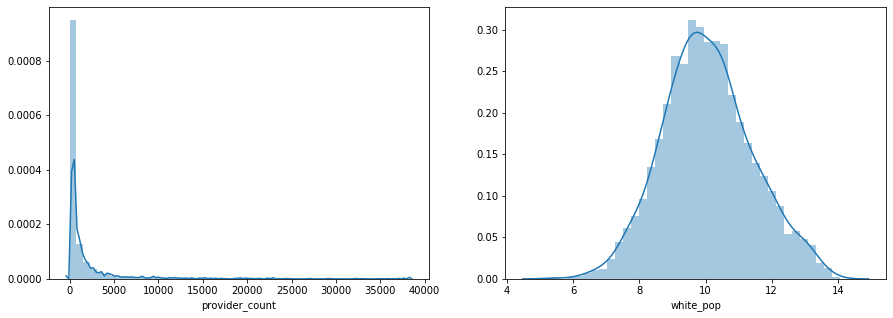

In [109]:
# Distribution of Dependent variable before and after transformation
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train_y_log, ax=ax2)
sns.distplot(train_y_lasso, ax=ax1)

From the plots above, we can see how the distribution of provider count varies before and after log transformation.

#### Run Global Model

In this model, we will build an Ordinary Least Squares (OLS) Regression Model using predictors selected from feature selection

In [112]:
X_train_log = sm.add_constant(train_x_log)
global_ols = sm.OLS(train_y_log, X_train_log).fit() 

In [113]:
global_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              white_pop   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.411e+04
Date:                Tue, 05 May 2020   Prob (F-statistic):               0.00
Time:                        16:41:23   Log-Likelihood:                 1645.7
No. Observations:                3051   AIC:                            -3249.
Df Residuals:                    3030   BIC:                            -3123.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.3573      0.560      2.426      0.015       0.260       2.454
minority_pop        -0.4202      0.008    -50.296      0.000      -0.437      -0.404
grad_deg             0.0038      0.010      0.388      0.698      -0.016       0.023
total_population     1.9136      0.135     14.213      0.000       1.650       2.178
percap_income       -0.5996      0.102     -5.895      0.000      -0.799      -0.400
avg_medicare        -1.7372      0.234     -7.429      0.000      -2.196      -1.279
asso_deg            -0.0175      0.010     -1.753      0.080      -0.037       0.002
edubase             -0.7199      0.130     -5.535      0.000      -0.975      -0.465
otherace_pop        -0.0226      0.006     -3.813      0.000      -0.034      -0.011
pop_density         -0.0072      0.004     -1.968      0.049      -0.014   -2.82e-05
avg_hhsz            -1.1336      0.107    -10.595      0.000      -1.343      -0.924
unemp_rate          -0.0187      0.006     -3.066      0.002      -0.031      -0.007
amerind_pop          0.0181      0.003      5.477      0.000       0.012       0.025
some_college         0.0131      0.018      0.739      0.460      -0.022       0.048
median_age           0.4025      0.078      5.145      0.000       0.249       0.556
avg_presdrug         1.9118      0.245      7.816      0.000       1.432       2.391
avg_socsecurity      0.6349      0.092      6.918      0.000       0.455       0.815
asian_pop           -0.0126      0.004     -2.885      0.004      -0.021      -0.004
bach_deg            -0.0098      0.015     -0.672      0.502      -0.038       0.019
black_pop            0.0492      0.004     12.807      0.000       0.042       0.057
hisp_pop             0.2178      0.008     26.430      0.000       0.202       0.234
==============================================================================
Omnibus:                     2402.375   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           127982.717
Skew:                          -3.285   Prob(JB):                         0.00
Kurtosis:                      34.042   Cond. No.                     7.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> Analysing the model summary, we can see that:
- The Adjusted R2 of our global model is 98.9% which means that 98.9% of variation in provider count can be explained by our model.
- The p-value of F-statistic is less than 0.05 which shows that atleast one of the predicting variables has predicting power on the variability of Provider Count.
- The p-values of individual variables determine which variables are statistically significant. The equation below is the final regression equation for our model showing statistically significant variables and their coefficients. Note that both dependent and independent variables are log transformed.

Text(0.5, 1.0, 'Model Coefficients - Global Model')

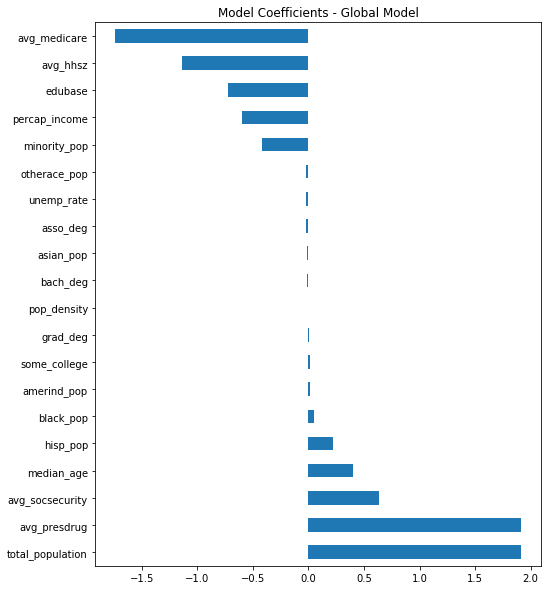

In [114]:
# Plot coefficients picked by model along with their importance
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
global_ols.params[1:].sort_values(ascending=False).plot(kind='barh')
plt.title('Model Coefficients - Global Model')

__Regression Equation__

$
\begin{align}
provider\_count = 0.2005*minority\_pop + 0.2312*grad\_deg + 0.7350*total\_population + 0.8371*percap\_income \\ + 3.8329*avg\_medicare + 0.0806*asso\_deg + 0.0412*otherace\_pop + 0.0544*amerind\_pop +0.0640*asian\_pop \\ - 2.1234*avg\_hhsz - 0.9313*median\_age - 4.5444*avg\_presdrug - 0.7842*avg\_socsecurity-0.1044*black\_pop-0.1451*hisp\_pop
\end{align}
$

In [83]:
# Model Interpretation
coef = 0.2312
((1.01**coef)-1)*100

0.23031647116877885

> __Model Interpretations:__
1. `𝑚𝑖𝑛𝑜𝑟𝑖𝑡𝑦_𝑝𝑜𝑝` - The coefficient is 0.2005. We can say that for 1% increase in minority population, Provider Count will increase by 0.20% ((1.01^coef-1)*100) holding all other predictors fixed.
2. `grad_deg` - The coefficient is 0.2312. We can say that for 1% increase in graduate degree holders, Provider Count will increase by 0.23% holding all other predictors fixed.
3. `𝑡𝑜𝑡𝑎𝑙_𝑝𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛` - The coefficient is 0.735. We can say that for 1% increase in total population, Provider Count will increase by 0.735% holding all other predictors fixed.
4. `𝑝𝑒𝑟𝑐𝑎𝑝_𝑖𝑛𝑐𝑜𝑚𝑒` - The coefficient is 0.8371. We can say that for 1% increase in per capita income, Provider Count will increase by 0.84% holding all other predictors fixed.
5. `𝑎𝑣𝑔_𝑚𝑒𝑑𝑖𝑐𝑎𝑟𝑒` - The coefficient is 3.8329. We can say that for 1% increase in average medicare, Provider Count will increase by 3.83% holding all other predictors fixed.
6. `𝑎𝑠𝑠𝑜_𝑑𝑒𝑔` - The coefficient is 0.0806. We can say that for 1% increase in associate degree holders, Provider Count will increase by 0.08% holding all other predictors fixed.
7. `otherace_pop` - The coefficient is 0.0412. We can say that for 1% increase in other race population, Provider Count will increase by 0.04% holding all other predictors fixed.
8. `𝑎𝑚𝑒𝑟𝑖𝑛𝑑_𝑝𝑜𝑝` - The coefficient is 0.0544. We can say that for 1% increase in american indian population, Provider Count will increase by 0.05% holding all other predictors fixed.
9. `asian_pop` - The coefficient is 0.0640. We can say that for 1% increase in asian population, Provider Count will increase by 0.06% holding all other predictors fixed.
10. `avg_hhsz` - The coefficient is -2.1234. We can say that for 1% increase in average household size, Provider Count will decrease by 2.12% holding all other predictors fixed.
11. `median_age` - The coefficient is -0.9313. We can say that for 1% increase in median age, Provider Count will decrease by 0.93% holding all other predictors fixed.
12. `𝑎𝑣𝑔_𝑝𝑟𝑒𝑠𝑑𝑟𝑢𝑔` - The coefficient is -4.5444. We can say that for 1% increase in average prescription drug, Provider Count will decrease by 4.54% holding all other predictors fixed.
13. `𝑎𝑣𝑔_𝑠𝑜𝑐𝑠𝑒𝑐𝑢𝑟𝑖𝑡𝑦` - The coefficient is -0.7842. We can say that for 1% increase in average social security, Provider Count will decrease by 0.784% holding all other predictors fixed.
14. `black_pop` - The coefficient is -0.1044. We can say that for 1% increase in black population, Provider Count will decrease by 0.104% holding all other predictors fixed.
15. `ℎ𝑖𝑠𝑝_𝑝𝑜𝑝` - The coefficient is -0.1451. We can say that for 1% increase in hispanic population, Provider Count will decrease by 0.145% holding all other predictors fixed.

source for interpretation: https://www.cscu.cornell.edu/news/statnews/stnews83.pdf

In [115]:
# Calculate RMSE of global model
pred_val = global_ols.fittedvalues.copy()
new_rmse = rmse(train_y_log, pred_val)
new_rmse

0.1410922495146936

> We can see that the RMSE of our model is 0.14. Since RMSE has the same unit as the dependent variable, we can compare RMSE with the range of dependent variable to see how spread out our residuals are and see how fit our model is. A value of 0.14 on a range of 0-11 (dependent variable range) is pretty small showing the model is a good fit.

In [116]:
# Get confidence intervals
global_ols.conf_int(alpha=0.05, cols=None)

0         1
const             0.260185  2.454461
minority_pop     -0.436535 -0.403776
grad_deg         -0.015624  0.023322
total_population  1.649590  2.177558
percap_income    -0.799043 -0.400156
avg_medicare     -2.195674 -1.278720
asso_deg         -0.036980  0.002073
edubase          -0.974935 -0.464899
otherace_pop     -0.034257 -0.010989
pop_density      -0.014464 -0.000028
avg_hhsz         -1.343356 -0.923790
unemp_rate       -0.030579 -0.006724
amerind_pop       0.011632  0.024605
some_college     -0.021655  0.047851
median_age        0.249084  0.555853
avg_presdrug      1.432232  2.391434
avg_socsecurity   0.454945  0.814839
asian_pop        -0.021186 -0.004041
bach_deg         -0.038247  0.018727
black_pop         0.041665  0.056729
hisp_pop          0.201604  0.233913

#### Verify Assumptions

Here we will verify regression assumptions again

In [117]:
# Residual Value
residual = global_ols.resid

((array([-3.506336, -3.2629  , -3.128296, -3.033959, ...,  3.033959,  3.128296,  3.2629  ,  3.506336]),
  array([-2.034389, -1.411953, -1.259549, -1.173699, ...,  0.478329,  0.511109,  0.562363,  0.614172])),
 (0.12505349574295557, -4.290737653227288e-14, 0.8854051494909003))

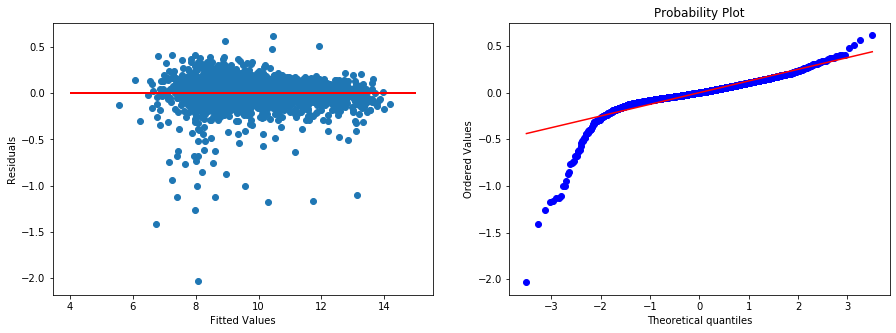

In [119]:
import scipy as sp
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

# Residuals vs Fitted
ax1.scatter(pred_val, residual)
ax1.hlines(y=0, xmin=4, xmax=15, linewidth=2, color='r')
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals')

# QQ plot
sp.stats.probplot(residual, plot=ax2, fit=True)

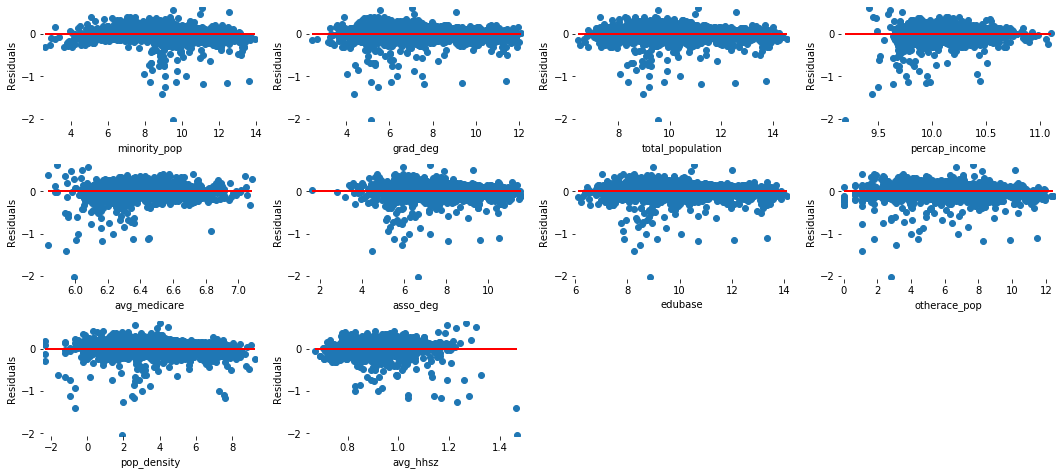

In [120]:
# Residuals vs Predictors
states = train_x_log.columns
fig = plt.figure(figsize=(15, 15))

for sp in range(0,10):
    mini = min(train_x_log.loc[:,states[sp]])
    maxi = max(train_x_log.loc[:,states[sp]])
    ax = fig.add_subplot(7,4,sp+1)
    ax.scatter(train_x_log.loc[:,states[sp]], residual)
    ax.hlines(y=0, xmin=mini, xmax=maxi, linewidth=2, color='r')
    ax.set_xlabel(states[sp])
    ax.set_ylabel('Residuals')
#     ax.set_ylim(0,provType.iloc[0,1])
    plt.xticks(rotation=0)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.margins(0.01, 0)
plt.tight_layout() # automatically adjusts layout to fit long labels
plt.show()

1. Residuals vs Fitted plot
    - **Constant Variance**: From the plot, we still observe a departure from constant variance as the distance of data points from zero line is not consistent. We can see that the variation in residuals is high initially and then starts to drop.
    - **Independence**:  We see that the data is randomly distributed along the zero line indicating the independence holds.


2. Probability Plot
    - **Normality**: From this plot, we see that the residuals follow straight line with departure at the tails. Normality assumption does not hold.


3. Residuals vs Predictors Plot
    - **Linearity**: From the plot, we can see that the residuals for each predictor variable are randomly distributed accross the 0 line. We can say that the linearity assumption holds.

## Geographically Weighted Regression (GWR) Model

The global model helps us identify a relationship between predictor variables and provider count at the country level. However, the dynamics of how different variables impact provider count can be very different for different counties within a state. The question we ask here is:

`What if an influential variable's impact on provider count varies accross different counties, i.e. how does average household size (or any other variable's) impact provider count vary across different counties?`

To answer this question we will explore `Geographically Weighted Regression Model`. 

Learn more about [Geographically Weighted Regression](https://pro.arcgis.com/en/pro-app/tool-reference/spatial-statistics/geographicallyweightedregression.htm).

### Run GWR Model

To run our analysis, we will use the cleaned demographic and health expenditure data layer `demographic_healthexp_clean_allproviders`. The output of the model will be stored in a file geodatabase which can then be accessed to visualize the results.

In [121]:
from arcpy.stats import GeographicallyWeightedRegression

In [122]:
import arcpy
arcpy.stats.GWR(r"C:\Users\mohi9282\Desktop\HealtcareProviderProject\arcgis\demographic_healthexp.gdb\demographic_healthexp_clean_allproviders",
                "provider_count", "CONTINUOUS", "asian_pop;amerind_pop;avg_hhsz;black_pop;hisp_pop;median_age;minority_pop; otherace_pop;percap_income;unemp_rate;white_pop;some_college;grad_deg;avg_healthinsurance; avg_medicare;avg_labtest;avg_presdrug;avg_personalinsurance", 
                r"C:\Users\mohi9282\Desktop\HealtcareProviderProject\arcgis\GWR_results\GWR_results.gdb\GWR_result_NB",
                "NUMBER_OF_NEIGHBORS", "USER_DEFINED", None, None, None, None, None, None, None, 50,
                None, None, None, None, "ROBUST", "GAUSSIAN", None)

<Result 'C:\\Users\\mohi9282\\Desktop\\HealtcareProviderProject\\arcgis\\GWR_results\\GWR_results.gdb\\GWR_result_test050520'>

### Access GWR Results as Spatially Enabled Dataframe

In [123]:
# Access GWR data from local
gwr_df = pd.DataFrame.spatial.from_featureclass(r'C:/Users/mohi9282/Desktop/HealtcareProviderProject/arcgis/GWR_results/GWR_results.gdb/GWR_result_NB')
gwr_df.head()

OBJECTID  SOURCE_ID  provider_count  asian_pop  amerind_pop  avg_hhsz  \
0         1          1          1044.0       1701          423      2.85   
1         2          2             5.0          6            3      2.40   
2         3          3           621.0        421          168      2.47   
3         4          4            79.0        258           69      2.77   
4         5          5          1210.0       1727          307      2.81   

   black_pop  hisp_pop  median_age  minority_pop  otherace_pop  percap_income  \
0      12062      3945        41.0         20664           886          41430   
1        895         8        37.9           913             2          16066   
2       1422      2977        40.0          5873           882          24981   
3        558      1307        40.4          2464           759          21821   
4      49467      9491        37.8         62154          4497          26350   

   unemp_rate  white_pop  some_college  grad_deg  avg_healthinsurance  \
0         5.6      75625         16211      8931              5227.44   
1         5.2        494           199        45              2149.61   
2         5.5      51908          7627      2153              3081.77   
3         3.1      16894          2043       574              3042.93   
4         6.1      31300         11944      5462              3356.61   

   avg_medicare  avg_labtest  avg_presdrug  avg_personalinsurance  \
0        767.21        83.06        157.57                 592.98   
1        475.83        36.65        102.27                 191.88   
2        547.19        51.40        114.41                 313.28   
3        557.61        47.81        122.89                 289.06   
4        520.50        54.48        109.17                 344.50   

       INTRCPT   SE_INTRCPT  C_ASIAN_POP  SE_ASIAN_POP  C_AMERIND_POP  \
0  7003.973124  2141.366259     0.310256      0.033458       1.097271   
1 -1745.604229  2935.190227    -0.478170      0.130672      -0.380992   
2  3737.791108  2734.082859    -0.213193      0.067255      -0.432541   
3  1915.795785  2852.177599     0.180153      0.155582       0.201596   
4   891.737879  2576.314931     0.287345      0.168638       0.360704   

   SE_AMERIND_POP   C_AVG_HHSZ  SE_AVG_HHSZ  C_BLACK_POP  SE_BLACK_POP  \
0        0.165953 -4075.380244  1011.578557     0.359284      0.028775   
1        0.174398   683.537729   985.884647    -0.343768      0.118052   
2        0.168884   -23.154782   985.266621    -0.073451      0.056708   
3        0.182907   179.544187  1150.031204     0.187214      0.154063   
4        0.229695   192.784449  1019.228415     0.297119      0.169935   

   C_HISP_POP  SE_HISP_POP  C_MEDIAN_AGE  SE_MEDIAN_AGE  C_MINORITY_POP  \
0    0.342201     0.027685     97.483423      30.204600       -0.302119   
1   -0.257633     0.111645     -9.258386      30.536804        0.357163   
2   -0.164923     0.044085    -30.844760      28.273383        0.078208   
3    0.088903     0.177700    -50.593994      30.054224       -0.185468   
4    0.241016     0.207226    -35.849165      29.657832       -0.285108   

   SE_MINORITY_POP  C_OTHERACE_POP  SE_OTHERACE_POP  C_PERCAP_INCOME  \
0         0.029817       -0.167129         0.024904        -0.356095   
1         0.120133       -0.235995         0.053123         0.074297   
2         0.054996        0.148998         0.050270        -0.047444   
3         0.154651        0.168909         0.090736         0.103712   
4         0.169749        0.059528         0.118817         0.063783   

   SE_PERCAP_INCOME  C_UNEMP_RATE  SE_UNEMP_RATE  C_WHITE_POP  SE_WHITE_POP  \
0          0.068713     -6.777611      37.671853     0.029684      0.002035   
1          0.115939    -26.509606      22.016369     0.001015      0.007435   
2          0.104205    -11.542619      29.784684    -0.016421      0.002972   
3          0.120839     -0.817736      30.586511     0.003961      0.008703   
4          0.111076      4.075680      29.

In [124]:
gwr_df.shape

(3139, 67)

### Plot GWR Results

#### Plot Average Household Size


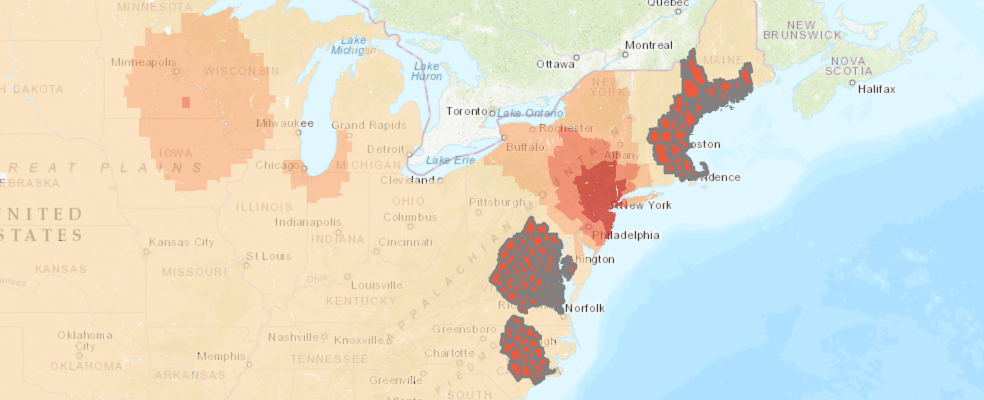

In [127]:
# Create Map
gwr_avg_hhsz_map = gis.map('Washington DC', 4)
gwr_avg_hhsz_map

> The map shows how provider count varies with average household size for different counties. We can see:
- Counties in New York, New Jersey and Philadelphia where an increase in average household size will have a higher impact on provider count.
- Similarly, for counties in Washington, Virginia, Maine, New Hampshire, Massachusetts an increase in average household size will have a higher impact on provider count.
- In the Midwest, areas near Chicago and Minneapolis also see a higher impact on provider count.

In [126]:
gwr_avg_hhsz_map.remove_layers()
gwr_df.spatial.plot(map_widget=gwr_avg_hhsz_map,
        renderer_type='c',  # for class breaks renderer
        method='esriClassifyNaturalBreaks',  # classification algorithm
        class_count=6,  # choose the number of classes
        col='C_AVG_HHSZ',  # numeric column to classify
        cmap='OrRd',  # color map to pick colors from for each class
        alpha=0.7,
        line_width=0) # specify opacity

True

In [20]:
# Add Legend
gwr_avg_hhsz_map.legend = True

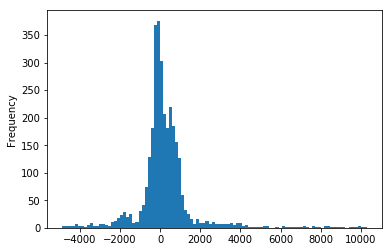

In [11]:
gwr_df['C_AVG_HHSZ'].plot(kind='hist', bins=100)

#### Plot Average Prescription Drug

MapView(layout=Layout(height='400px', width='100%'), zoom=4.0)


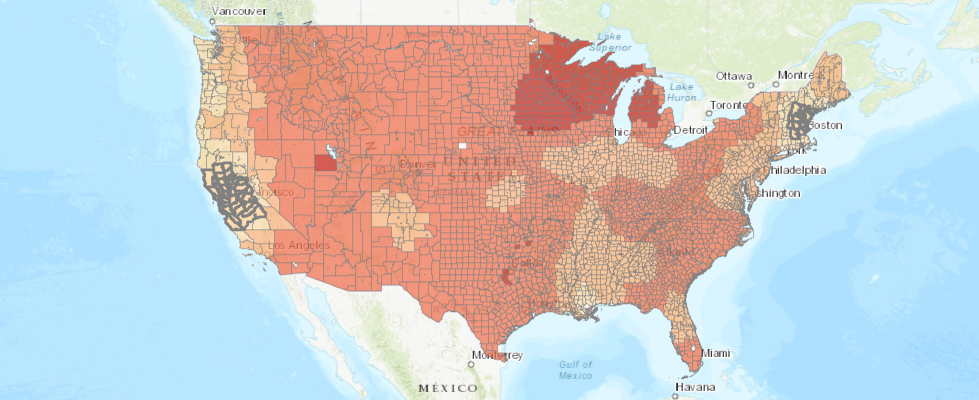

In [26]:
# Create Map
gwr_avg_presdrug_map = gis.map('USA', 4)
gwr_avg_presdrug_map

> The map shows how provider count varies with average prescription drug prices for different counties. We can see:
- Provider Count in majority of California and areas in New Hampshire is strongly negatively impacted by increase in average prescription drug prices. This means increase in average prescription drug prices will reduce provider count
- For areas in Minnesota and Wisconsin, provider count is strongly positively impacted by increase in average prescription drug prices.This means increase in average prescription drug prices will increase provider count
- Although for majority of midwest, provider count is positively impacted by average prescription drug prices, some counties in North New Mexico, Southern Colorado and Kansas seem to have a slight negative impact.

In [27]:
gwr_avg_presdrug_map.remove_layers()
gwr_df.spatial.plot(map_widget=gwr_avg_presdrug_map,
        renderer_type='c',  # for class breaks renderer
        method='esriClassifyNaturalBreaks',  # classification algorithm
        class_count=6,  # choose the number of classes
        col='C_AVG_PRESDRUG',  # numeric column to classify
        cmap='OrRd',  # color map to pick colors from for each class
        alpha=0.7,
        line_width=0.05) # specify opacity

True

In [28]:
gwr_avg_presdrug_map.legend = True

## Forest Based Classification and Regression Trees Model

The global model and GWR model are parametric models and they assume either a linear relationship between predictors and response variable or assume a form of the function and identify influential factors at the country level and at county level. These methods are easy to understand however, are highly constrained to the specified form. But:

`What if this relationship between predictors and response is not linear? OR What if we do not make strong assumptions about the form of function?`

To answer this question, we will explore a non-parametric technique called `Forest Based Classification and Regression Trees Model`. Forest based models are good black box models that map non-linear and complex relationships quite well and are not influenced by outliers and missing values to an extent.

Forest Based Classification and Regression Trees creates an ensemble of decision trees. Each decision tree is created using randomly generated portions of data. Each tree generates its own prediction and votes on an outcome. The forest model considers votes from all decision trees to predict or classify the outcome. The model will output a variable importance table to identify importance of each variable given to the model.

Leran more about [Forest Based Classification and Regression Trees](https://pro.arcgis.com/en/pro-app/tool-reference/spatial-statistics/forestbasedclassificationregression.htm).

### Build RF Model

To run our analysis, we will use the cleaned demographic and health expenditure data layer `demographic_healthexp_clean_allproviders`. The output of the model will be stored in a file geodatabase which can then be accessed to visualize the results.

Here, we created a 'Train Only' model with all predictors. This model has 100 tress with 100% data for each tree and 30% data excluded for validation. The model was run for 5 iterations.

In [130]:
from arcpy.stats import Forest

In [151]:
arcpy.stats.Forest("TRAIN", r"C:\Users\mohi9282\Desktop\HealtcareProviderProject\arcgis\demographic_healthexp.gdb\demographic_healthexp_clean_allproviders", "provider_count",
                   None, "amerind_pop false;asian_pop false;asso_deg false;avg_healthcare false;avg_healthinsurance false;avg_hhinc false;avg_hhsz false;avg_labtest false;avg_medicalcare false;avg_medicalsrvc false;avg_medicare false;avg_personalinsurance false;avg_presdrug false;avg_socsecurity false;bach_deg false;black_pop false;grad_deg false;hisp_pop false;median_age false;minority_pop false;otherace_pop false;percap_income false;pop_density false;some_college false;unemp_rate false;white_pop false",
                   None, None, None, None, None, None, None, None, r"C:\Users\mohi9282\Desktop\HealtcareProviderProject\arcgis\RF_results\RF_NBresults.gdb\Training_Output",
                   r"C:\Users\mohi9282\Desktop\HealtcareProviderProject\arcgis\RF_results\RF_NBresults.gdb\Variable_Importance",
                   "TRUE", 100, None, None, 100, None, 30, None, None, "FALSE", 5, "FALSE")

<Result ''>

### Get Variable Importance

In [152]:
# RF Vimp Table
rf_df = pd.DataFrame.spatial.from_table(r'C:/Users/mohi9282/Desktop/HealtcareProviderProject/arcgis/RF_results/RF_NBresults.gdb/Variable_Importance')
rf_df.head()

OBJECTID     ASIAN_POP   AMERIND_POP      AVG_HHSZ     AVG_HHINC  \
0         1  2.794681e+09  1.309387e+09  3.740494e+08  3.215561e+08   
1         2  1.152594e+09  4.366677e+08  2.525499e+08  6.174919e+07   
2         3  4.118597e+09  3.920756e+08  4.273156e+08  1.201228e+08   
3         4  6.938124e+09  1.818142e+09  6.322299e+08  1.241559e+08   
4         5  2.898623e+09  9.062651e+08  3.563007e+08  1.199997e+08   

      BLACK_POP      HISP_POP    MEDIAN_AGE  MINORITY_POP  OTHERACE_POP  \
0  4.022764e+09  5.128206e+09  2.372728e+08  1.084164e+10  2.494083e+09   
1  2.212028e+09  1.292544e+09  1.669707e+08  3.930533e+09  6.269217e+08   
2  1.838364e+09  2.971876e+09  3.797857e+08  1.001798e+10  4.913815e+09   
3  1.764677e+09  1.728459e+09  1.156817e+08  1.141337e+10  4.026656e+09   
4  6.726844e+08  5.119744e+09  1.105915e+08  1.177892e+10  6.751748e+09   

   PERCAP_INCOME   POP_DENSITY    UNEMP_RATE     WHITE_POP  SOME_COLLEGE  \
0   2.259854e+08  4.600435e+08  1.712880e+08  1.569303e+10  1.202075e+10   
1   1.976356e+08  4.538932e+08  2.051963e+08  7.138243e+09  8.812592e+09   
2   2.692993e+08  4.804694e+08  2.058942e+08  1.314713e+10  9.791411e+09   
3   1.572008e+08  6.399245e+08  2.267154e+08  9.332004e+09  1.091424e+10   
4   1.892767e+08  5.476753e+08  2.222864e+08  1.034883e+10  1.071929e+10   

       ASSO_DEG      BACH_DEG      GRAD_DEG  AVG_HEALTHCARE  \
0  1.124212e+10  2.053912e+10  2.107842e+10    8.551306e+07   
1  5.497762e+09  1.641966e+10  1.782924e+10    9.935179e+07   
2  1.124546e+10  2.018663e+10  2.182934e+10    7.545858e+07   
3  4.408350e+09  1.984723e+10  2.447649e+10    1.188411e+08   
4  9.807524e+09  2.585526e+10  2.778828e+10    8.113561e+07   

   AVG_HEALTHINSURANCE  AVG_MEDICARE  AVG_MEDICALCARE  AVG_MEDICALSRVC  \
0         7.719984e+07  6.325393e+07     1.807711e+08     6.909633e+07   
1         1.210250e+08  1.156265e+08     1.037769e+08     9.370543e+07   
2         8.998006e+07  1.295062e+08     1.694495e+08     2.388553e+08   
3         1.096512e+08  1.602729e+08     8.446929e+07     1.112718e+08   
4         7.665979e+07  9.857327e+07     1.470847e+08     1.018045e+08   

    AVG_LABTEST  AVG_PRESDRUG  AVG_PERSONALINSURANCE  AVG_SOCSECURITY  \
0  1.401877e+08  2.843793e+08           2.457326e+08     1.668692e+08   
1  2.277049e+08  1.039948e+08           9.264829e+07     1.401073e+08   
2  1.377743e+08  2.496273e+08           2.328412e+08     2.929945e+08   
3  1.022469e+08  1.078219e+08           8.450852e+07     1.404277e+08   
4  1.486080e+08  2.577621e+08           6.960686e+07     1.782745e+08   

         BEST_ITE  
0      Iterations  
1  Best Iteration  
2      Iterations  
3      Iterations  
4      Iterations

In [153]:
rf_df.shape

(5, 28)

### Plot Variable Importance

In [157]:
data = rf_df.drop(['OBJECTID','BEST_ITE'],axis=1)
data

ASIAN_POP   AMERIND_POP      AVG_HHSZ     AVG_HHINC     BLACK_POP  \
0  2.794681e+09  1.309387e+09  3.740494e+08  3.215561e+08  4.022764e+09   
1  1.152594e+09  4.366677e+08  2.525499e+08  6.174919e+07  2.212028e+09   
2  4.118597e+09  3.920756e+08  4.273156e+08  1.201228e+08  1.838364e+09   
3  6.938124e+09  1.818142e+09  6.322299e+08  1.241559e+08  1.764677e+09   
4  2.898623e+09  9.062651e+08  3.563007e+08  1.199997e+08  6.726844e+08   

       HISP_POP    MEDIAN_AGE  MINORITY_POP  OTHERACE_POP  PERCAP_INCOME  \
0  5.128206e+09  2.372728e+08  1.084164e+10  2.494083e+09   2.259854e+08   
1  1.292544e+09  1.669707e+08  3.930533e+09  6.269217e+08   1.976356e+08   
2  2.971876e+09  3.797857e+08  1.001798e+10  4.913815e+09   2.692993e+08   
3  1.728459e+09  1.156817e+08  1.141337e+10  4.026656e+09   1.572008e+08   
4  5.119744e+09  1.105915e+08  1.177892e+10  6.751748e+09   1.892767e+08   

    POP_DENSITY    UNEMP_RATE     WHITE_POP  SOME_COLLEGE      ASSO_DEG  \
0  4.600435e+08  1.712880e+08  1.569303e+10  1.202075e+10  1.124212e+10   
1  4.538932e+08  2.051963e+08  7.138243e+09  8.812592e+09  5.497762e+09   
2  4.804694e+08  2.058942e+08  1.314713e+10  9.791411e+09  1.124546e+10   
3  6.399245e+08  2.267154e+08  9.332004e+09  1.091424e+10  4.408350e+09   
4  5.476753e+08  2.222864e+08  1.034883e+10  1.071929e+10  9.807524e+09   

       BACH_DEG      GRAD_DEG  AVG_HEALTHCARE  AVG_HEALTHINSURANCE  \
0  2.053912e+10  2.107842e+10    8.551306e+07         7.719984e+07   
1  1.641966e+10  1.782924e+10    9.935179e+07         1.210250e+08   
2  2.018663e+10  2.182934e+10    7.545858e+07         8.998006e+07   
3  1.984723e+10  2.447649e+10    1.188411e+08         1.096512e+08   
4  2.585526e+10  2.778828e+10    8.113561e+07         7.665979e+07   

   AVG_MEDICARE  AVG_MEDICALCARE  AVG_MEDICALSRVC   AVG_LABTEST  AVG_PRESDRUG  \
0  6.325393e+07     1.807711e+08     6.909633e+07  1.401877e+08  2.843793e+08   
1  1.156265e+08     1.037769e+08     9.370543e+07  2.277049e+08  1.039948e+08   
2  1.295062e+08     1.694495e+08     2.388553e+08  1.377743e+08  2.496273e+08   
3  1.602729e+08     8.446929e+07     1.112718e+08  1.022469e+08  1.078219e+08   
4  9.857327e+07     1.470847e+08     1.018045e+08  1.486080e+08  2.577621e+08   

   AVG_PERSONALINSURANCE  AVG_SOCSECURITY  
0           2.457326e+08     1.668692e+08  
1           9.264829e+07     1.401073e+08  
2           2.328412e+08     2.929945e+08  
3           8.450852e+07     1.404277e+08  
4           6.960686e+07     1.782745e+08

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

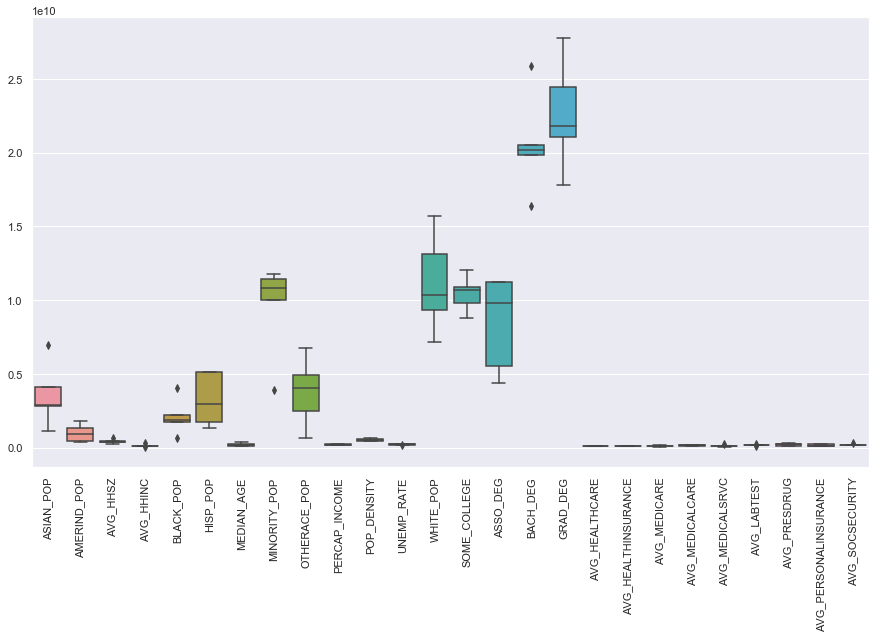

In [159]:
sns.set(rc={'figure.figsize':(15,8.27)})
data = rf_df.drop(['OBJECTID','BEST_ITE'],axis=1)
g = sns.boxplot(data = data)
# g = sns.boxplot(data = rf_df.iloc[:,:-2])
plt.xticks(rotation=90)

> We ran 5 iterations of Random Forest model. The box plot shows variable importance of each variable and how importance varies for each iteration. These variables will now be used in the next step of our analysis to understand how they vary with respect to provider count accross various counties in U.S.

#### Plot Best Iteration

In [160]:
# Create dataframe for Best Iteration
best = rf_df[rf_df['BEST_ITE']=='Best Iteration']
best

OBJECTID     ASIAN_POP   AMERIND_POP      AVG_HHSZ     AVG_HHINC  \
1         2  1.152594e+09  4.366677e+08  2.525499e+08  6.174919e+07   

      BLACK_POP      HISP_POP    MEDIAN_AGE  MINORITY_POP  OTHERACE_POP  \
1  2.212028e+09  1.292544e+09  1.669707e+08  3.930533e+09  6.269217e+08   

   PERCAP_INCOME   POP_DENSITY    UNEMP_RATE     WHITE_POP  SOME_COLLEGE  \
1   1.976356e+08  4.538932e+08  2.051963e+08  7.138243e+09  8.812592e+09   

       ASSO_DEG      BACH_DEG      GRAD_DEG  AVG_HEALTHCARE  \
1  5.497762e+09  1.641966e+10  1.782924e+10    9.935179e+07   

   AVG_HEALTHINSURANCE  AVG_MEDICARE  AVG_MEDICALCARE  AVG_MEDICALSRVC  \
1         1.210250e+08  1.156265e+08     1.037769e+08     9.370543e+07   

    AVG_LABTEST  AVG_PRESDRUG  AVG_PERSONALINSURANCE  AVG_SOCSECURITY  \
1  2.277049e+08  1.039948e+08           9.264829e+07     1.401073e+08   

         BEST_ITE  
1  Best Iteration

Text(0.5, 1.0, 'Variable Importance - Best Iteration')

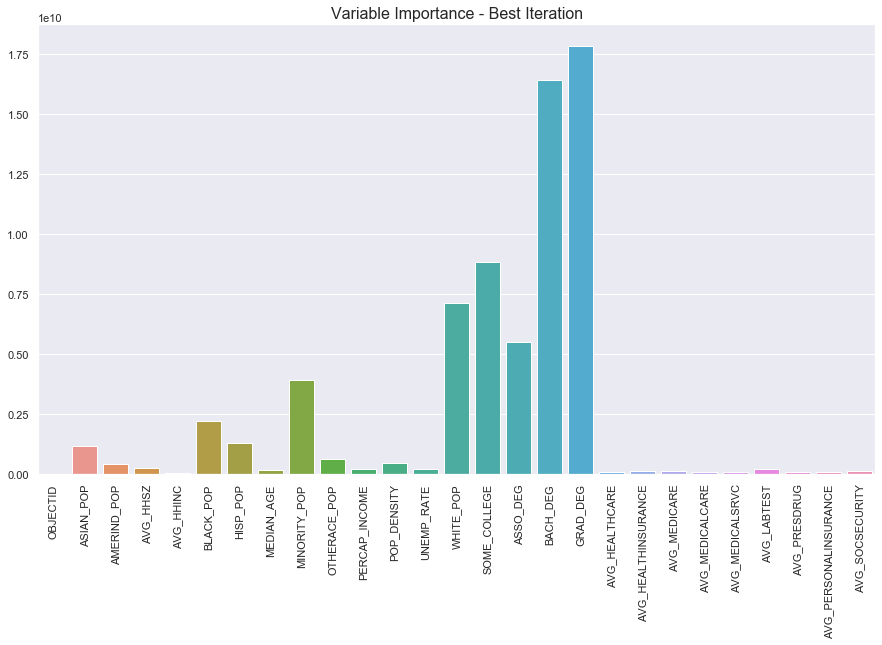

In [161]:
# Create Plot
sns.set(rc={'figure.figsize':(15,8.27)})
sns.barplot(data=best)
plt.xticks(rotation=90)
plt.title('Variable Importance - Best Iteration', fontsize=16)

## Local Bivariate Relationships (LBR) Model

Random Forest model generates variable importance and gives us important variables. However, this model does not tell us:
- the type of relationship and 
- significance of relation of a predictor variable with respect to provider count.

To understand the type and significance of the relations of a predictor variable with respect to provider count at the County level, we will explore `Local Bivariate Relations Model`.

Local Bivariate Relations analyzes two variables for statistically significant relationships using local entropy. The output can be used to visualize the type of relationship between two variables and explore how their relationship changes across counties.

We will use Local Bivariate Relations to study how relationship of important variables determined by Random Forest model change with respect to Provider Count accross various counties. 

Learn more about [Local Bivariate Relationships](https://pro.arcgis.com/en/pro-app/tool-reference/spatial-statistics/localbivariaterelationships.htm).


### Build Model - Provider Count and White Population

To run our analysis, we will use the cleaned demographic and health expenditure data layer `demographic_healthexp_clean_allproviders`. The output of the model will be stored in a file geodatabase which can then be accessed to visualize the results.

In [162]:
import arcpy
from arcpy.stats import LocalBivariateRelationships

In [171]:
# Create model
arcpy.env.overwriteOutput = True
arcpy.stats.LocalBivariateRelationships(r"C:\Users\mohi9282\Desktop\HealtcareProviderProject\arcgis\demographic_healthexp.gdb\demographic_healthexp_clean_allproviders",
                                        "provider_count", "white_pop", r"C:\Users\mohi9282\Desktop\HealtcareProviderProject\arcgis\LBR_NBresults.gdb\allprovider_white_pop_LBR",
                                        50, 199, "NO_POPUP", "95%", "APPLY_FDR", 0.5)

<Result 'C:\\Users\\mohi9282\\Desktop\\HealtcareProviderProject\\arcgis\\LBR_NBresults.gdb\\allprovider_white_pop_LBR'>

#### Access Model Results as Spatially Enabled Dataframe

In [172]:
# Access GWR data from local
lbr_whitepop = pd.DataFrame.spatial.from_featureclass(r'C:/Users/mohi9282/Desktop/HealtcareProviderProject/arcgis/LBR_NBresults.gdb/allprovider_white_pop_LBR')
lbr_whitepop.head()

OBJECTID  SOURCE_ID  provider_count  white_pop   ENTROPY  PVALUES  \
0         1          1          1044.0      75625  0.463670    0.005   
1         2          2             5.0        494  0.172985    0.005   
2         3          3           621.0      51908  0.392919    0.005   
3         4          4            79.0      16894  0.322509    0.005   
4         5          5          1210.0      31300  0.347374    0.005   

          LBR_SIG  INTERCEPT    COEF_1  PINTERCEPT  P_COEF_1   P_COEF_2  \
0  99% Confidence  -0.000895  0.955449   -0.004775  1.360499  -3.866544   
1  99% Confidence  -0.000454  0.991115   -0.002512  2.194106 -60.014844   
2  99% Confidence  -0.010202  1.137936   -0.004555  0.707942   2.594432   
3  99% Confidence  -0.003358  0.876637   -0.000793  0.457978   5.179018   
4  99% Confidence  -0.003391  0.903693   -0.000686  0.501848   4.935998   

         AICC        R2      P_AICc      P_R2 SIG_COEF P_SIG_COEF  \
0 -222.467382  0.553300 -221.688539  0.558060       _*        _*_   
1 -401.267715  0.513645 -407.081515  0.578266       _*        ***   
2 -305.122955  0.946124 -314.600098  0.956583       **        ***   
3 -304.556412  0.768763 -305.208207  0.777680       **        _**   
4 -302.769404  0.741085 -303.106776  0.749499       **        _*_   

          LBR_TYPE                                              SHAPE  
0  Positive Linear  {'rings': [[[-76.59976019599998, 38.4347499310...  
1          Concave  {'rings': [[[-91.09608969999994, 32.6789840000...  
2           Convex  {'rings': [[[-82.84007999999994, 41.2553200000...  
3  Positive Linear  {'rings': [[[-83.45976999999993, 34.4811400000...  
4  Positive Linear  {'rings': [[[-83.91481999999996, 33.7442000000...

In [173]:
lbr_whitepop.shape

(3139, 20)

In [174]:
# Counts of different relationship types
lbr_whitepop.LBR_TYPE.value_counts()

Convex             1928
Positive Linear    1058
Concave             153
Name: LBR_TYPE, dtype: int64

#### Plot Results on Map


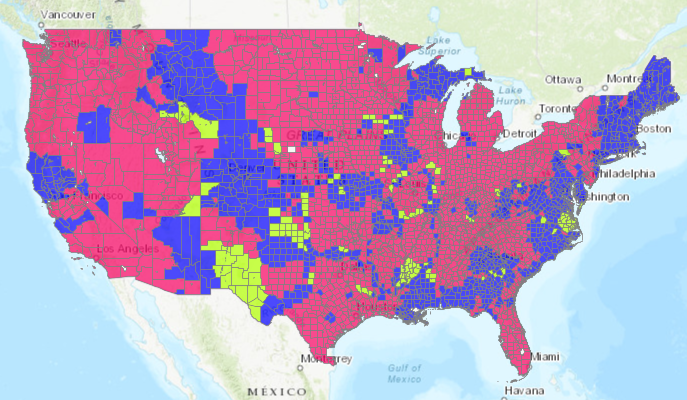

In [178]:
# Create Map
lbr_whitepop_map = gis.map('USA', 4)
lbr_whitepop_map

> The map shows how relationship of provider count varies with white population for different counties. We can see:
- For most of the counties in United States, the relationship is either Convex or Positive Linear which means that provider count increase with increasing white population either linearly or polynomially.
- Southern parts of New Mexico, some counties in North Texas, Wyoming and Idaho have a concave relationship. This means that provider count increases to a certain extent and then plateaus off at some point.

In [176]:
lbr_whitepop_map.remove_layers()
lbr_whitepop.spatial.plot(map_widget=lbr_whitepop_map,
        renderer_type='u',  # for class breaks renderer
        col='LBR_TYPE',  # numeric column to classify
        cmap='prism',  # color map to pick colors from for each class
        alpha=0.7,
        line_width=0.05) # specify opacity

True

In [20]:
lbr_whitepop_map.legend = True

### Build Model - Provider Count and Graduate Degree

In [179]:
# Local bivariate
import arcpy
# Create model
arcpy.env.overwriteOutput = True
arcpy.stats.LocalBivariateRelationships(r"C:\Users\mohi9282\Desktop\HealtcareProviderProject\arcgis\demographic_healthexp.gdb\demographic_healthexp_clean_allproviders",
                                        "provider_count", "grad_deg", r"C:\Users\mohi9282\Desktop\HealtcareProviderProject\arcgis\LBR_NBresults.gdb\allprovider_grad_deg_LBR",
                                        50, 199, "NO_POPUP", "95%", "APPLY_FDR", 0.5)

<Result 'C:\\Users\\mohi9282\\Desktop\\HealtcareProviderProject\\arcgis\\LBR_NBresults.gdb\\allprovider_grad_deg_LBR'>

#### Access Model Results as Spatially Enabled Dataframe

In [180]:
# Access GWR data from local
lbr_graddeg = pd.DataFrame.spatial.from_featureclass(r'C:/Users/mohi9282/Desktop/HealtcareProviderProject/arcgis/LBR_NBresults.gdb/allprovider_grad_deg_LBR')
lbr_graddeg.head()

OBJECTID  SOURCE_ID  provider_count  grad_deg   ENTROPY  PVALUES  \
0         1          1          1044.0      8931  0.507737    0.005   
1         2          2             5.0        45  0.152911    0.005   
2         3          3           621.0      2153  0.351782    0.005   
3         4          4            79.0       574  0.309155    0.005   
4         5          5          1210.0      5462  0.312456    0.005   

          LBR_SIG  INTERCEPT    COEF_1  PINTERCEPT  P_COEF_1   P_COEF_2  \
0  99% Confidence   0.002849  0.458452   -0.002108  0.792085  -1.261173   
1  99% Confidence   0.000017  1.115497    0.000651  0.470873  31.338637   
2  99% Confidence  -0.001591  1.237535    0.000261  0.940722   2.061568   
3  99% Confidence   0.000208  0.615024    0.000161  0.623251  -0.054390   
4  99% Confidence   0.000090  0.603811    0.000518  0.535677   0.441553   

         AICC        R2      P_AICc      P_R2 SIG_COEF P_SIG_COEF  \
0 -247.686399  0.730247 -255.821543  0.776701       _*        _**   
1 -446.296708  0.802377 -449.717733  0.820235       _*        _**   
2 -329.967431  0.967221 -333.471945  0.970232       _*        _**   
3 -411.125820  0.972559 -408.795514  0.971995       _*        _*_   
4 -434.274636  0.981340 -435.557616  0.982284       _*        _**   

          LBR_TYPE                                              SHAPE  
0          Concave  {'rings': [[[-76.59976019599998, 38.4347499310...  
1           Convex  {'rings': [[[-91.09608969999994, 32.6789840000...  
2           Convex  {'rings': [[[-82.84007999999994, 41.2553200000...  
3  Positive Linear  {'rings': [[[-83.45976999999993, 34.4811400000...  
4  Positive Linear  {'rings': [[[-83.91481999999996, 33.7442000000...

In [181]:
lbr_graddeg.shape

(3139, 20)

In [182]:
lbr_graddeg.LBR_TYPE.value_counts()

Positive Linear    1170
Convex             1081
Concave             888
Name: LBR_TYPE, dtype: int64

#### Plot Results on Map


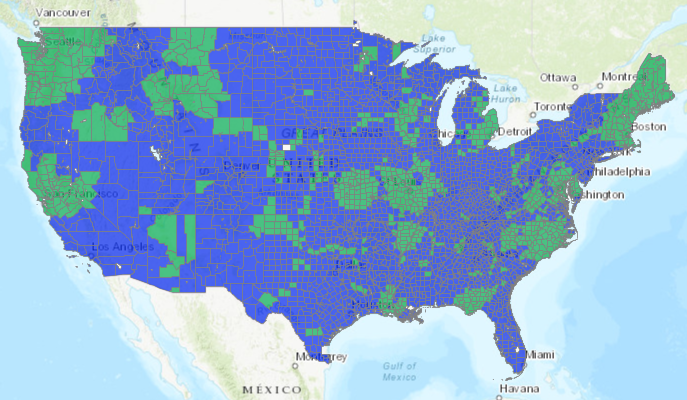

In [186]:
# Create Map
lbr_graddeg_map = gis.map('USA', 4)
lbr_graddeg_map

> The map shows how relationship of provider count varies with graduate degree holders for different counties. We can see:
- Majority of the counties from North Dakota to Texas share a Convex or Positive Linear relation. This means that provider count increase with increasing graduate degree holders for these counties either linearly or polynomially.
- Majority of East and West coast share a concave relation whcih means that provider count increases with graduater degree holders to a certain extent and then plateaus off at some point.

In [185]:
lbr_graddeg_map.remove_layers()
lbr_graddeg.spatial.plot(map_widget=lbr_graddeg_map,
        renderer_type='u',  # for unique value renderer
        col='LBR_TYPE',  # numeric column to classify
        cmap='prism',  # color map to pick colors from for each class
        alpha=0.7,
        line_width=0.05) # specify opacity

True

In [32]:
lbr_graddeg_map.legend = True

## Summary

To summarize, we:

1. Started with a `Base (OLS) Regression model` using all predictors:
 - Performed feature selection using `Lasso regularization` technique.
 - Created a `Global (OLS) Regression model` using selected features.
The Global model helped us identify relationship between predictor variables and provider count at the country level.


2. Next we created a `Geographically Weighted Regression (GWR) model`, to understand how different variables impact provider count accross different counties.
    a. Here we plotted how provider count varies with average prescription drug prices and average household size across different counties.


3. To investigate non-linear relationship, we explored a non-parametric technique called `Forest Based Classification and Regression Trees model`.
    a. The model returned `variable importance` of each variable. 


4.  To understand the type and significance of relationship of an individual predictor  with respect to provider count, we created a `Local Bivariate Relations Model`.


## Conclusion

To conclude, this 4 part study shows:
1. Variation of Overall, OB-GYN and Mental healthcare provider supply across different geographical areas. 


2. Summarizes most distinctive and relevant socio-demographic features predictive of a community’s provider shortages. 


3. Could help healthcare leaders:
 - better understand social determinants of health in their geographies
 - prioritize interventions around addressing underserved areas